<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/Transcriptomic_Data_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction: Principle component analysis**


Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional space while preserving as much of the variance (information) as possible. The method achieves this by identifying directions (principal components) in which the data varies the most.



# Data Uploading

In [ ]:
# Load data from the uploaded CSV file
data_file <- "/content/PDXdataset (1).csv"  # Replace with your file path
expr_matrix <- read.csv(data_file, header = TRUE, row.names = 1)





Warning message in file(file, "rt"):
“cannot open file '/content/PDXdataset (1).csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# Check the structure of the data
dim(expr_matrix)  # Dimensions of the dataset

[1] 102856     14

In [ ]:
head(expr_matrix[, 1:5])

,Tumor_,Tumor_.1,Tumor_.2,Tumor_.3,Tumor_.4
,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,0,0,0,0,0
ENSG00000000005,0,0,0,0,0
ENSG00000000419,0,0,0,0,0
ENSG00000000457,0,0,0,0,0
ENSG00000000460,0,0,0,0,0
ENSG00000000938,0,0,0,0,0


# **if txt file **

In [ ]:
# Load data from the uploaded file
data_file <- "path_to_your_uploaded_file/GSE183947_data.txt"  # Replace with your file path
expr_matrix <- read.table(data_file, header = TRUE, row.names = 1, sep = "\t")

# Check the structure of the data
dim(expr_matrix)  # Dimensions of the dataset
head(expr_matrix[, 1:5])  # Preview the first few rows and columns


Warning message in file(file, "rt"):
“cannot open file 'path_to_your_uploaded_file/GSE183947_data.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


# **Filter and Preprocess the Data**

# **Removal of low expression genes**
To reduce noise and improve computational efficiency

In [ ]:
expr_matrix <- expr_matrix[rowSums(expr_matrix > 1) >= 3, ]
dim(expr_matrix)  # Check the new dimensions


[1] 649  14

# **log transformation**
The purpose of applying a log transformation to the expression matrix is to reduce the range of values and make the data more suitable for downstream analyses, such as dimensionality reduction (PCA).

In [ ]:
expr_matrix_log <- log2(expr_matrix + 1)


# **Perform Dimensionality Reduction Using PCA**

In [ ]:
pca_result <- prcomp(t(expr_matrix_log), scale. = TRUE)


In [ ]:
summary(pca_result)


Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     12.0901 9.8408 8.02691 7.75696 6.82898 6.68096 6.31322
Proportion of Variance  0.2252 0.1492 0.09928 0.09271 0.07186 0.06878 0.06141
Cumulative Proportion   0.2252 0.3744 0.47372 0.56643 0.63829 0.70706 0.76848
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     6.21745 5.98027 5.43701 4.96525 3.46147 3.10521
Proportion of Variance 0.05956 0.05511 0.04555 0.03799 0.01846 0.01486
Cumulative Proportion  0.82804 0.88315 0.92869 0.96668 0.98514 1.00000
                            PC14
Standard deviation     4.994e-15
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

# **Assign Tumor and Normal Labels**

In [ ]:
# Get PCA results (first two principal components)
pca_df <- as.data.frame(pca_result$x)

# Assign Tumor and Normal labels
sample_labels <- c(rep("TN", 7), rep("ER", 7))

# Add this to your PCA data frame
pca_df$Condition <- sample_labels
head(pca_df)

ERROR: Error: object 'pca_result' not found


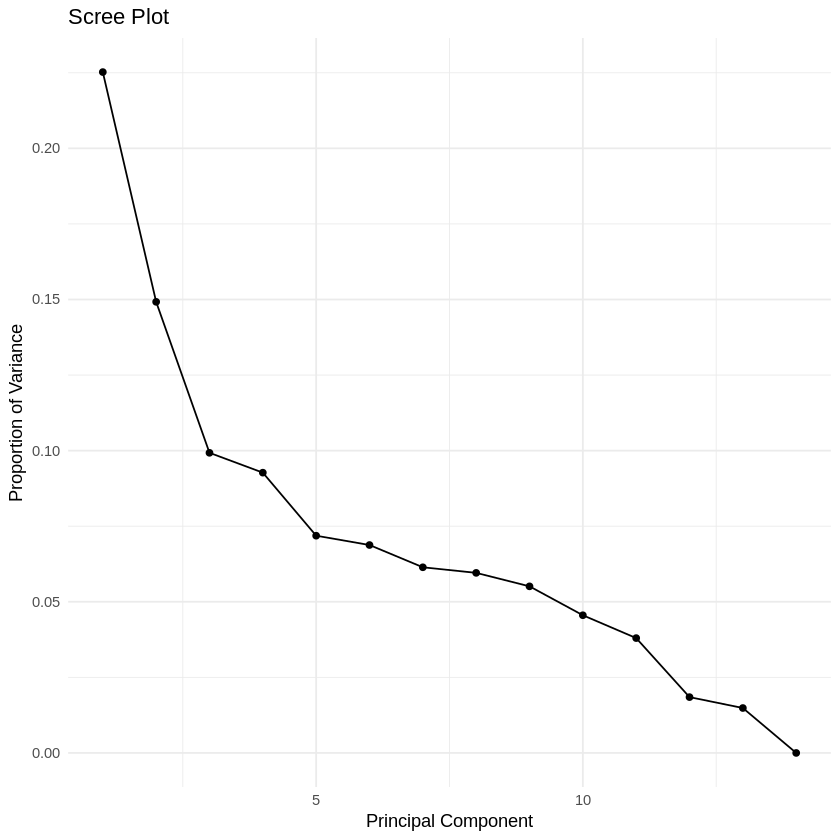

In [ ]:
scree_data <- data.frame(
  PC = 1:length(pca_result$sdev),
  Variance = (pca_result$sdev^2) / sum(pca_result$sdev^2)
)
ggplot(scree_data, aes(x = PC, y = Variance)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(title = "Scree Plot", x = "Principal Component", y = "Proportion of Variance")


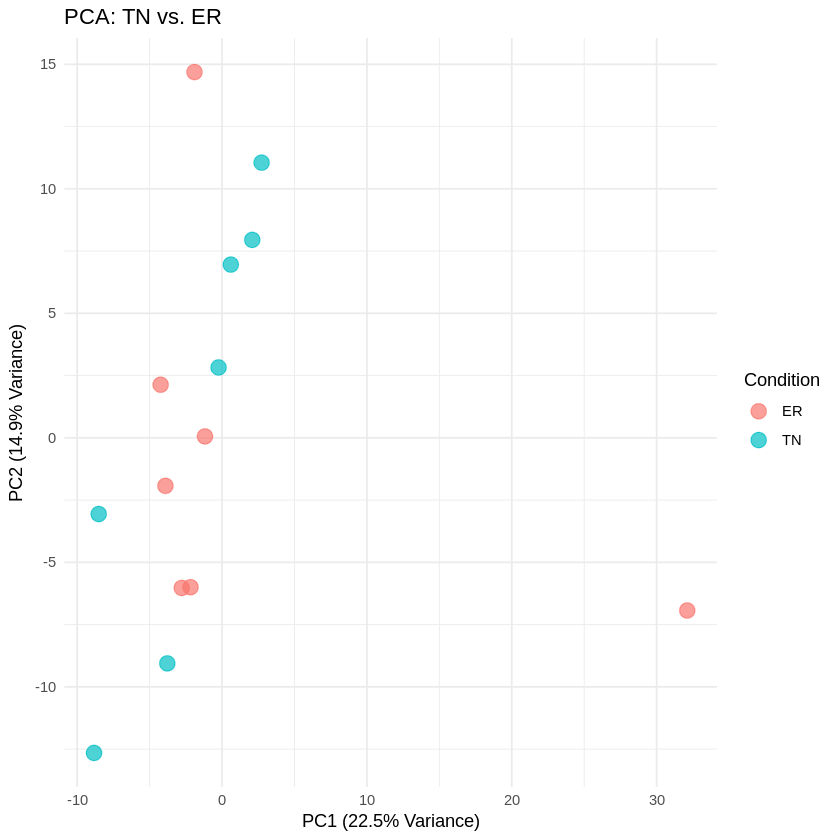

In [ ]:
ggplot(pca_df, aes(x = PC2, y = PC3, color = Condition)) +
  geom_point(size = 4, alpha = 0.7) +
  theme_minimal() +
   labs(title = "PCA: TN vs. ER",
       x = paste0("PC1 (", round(summary(pca_result)$importance[2, 1] * 100, 1), "% Variance)"),
       y = paste0("PC2 (", round(summary(pca_result)$importance[2, 2] * 100, 1), "% Variance)"))



In [ ]:
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


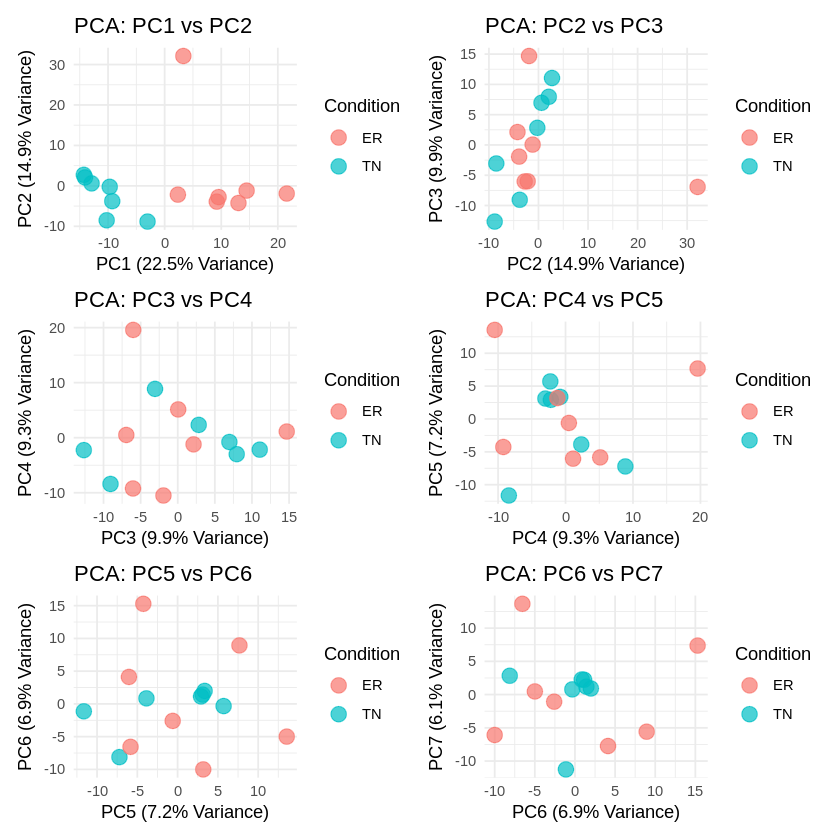

In [ ]:
# Load necessary library
library(ggplot2)
library(patchwork)  # For arranging multiple plots

# Define a function to create PCA scatter plots
create_pca_plot <- function(x_pc, y_pc, pca_df, pca_result) {
  ggplot(pca_df, aes_string(x = x_pc, y = y_pc, color = "Condition")) +
    geom_point(size = 4, alpha = 0.7) +
    theme_minimal() +
    labs(
      title = paste("PCA:", x_pc, "vs", y_pc),
      x = paste0(x_pc, " (", round(summary(pca_result)$importance[2, as.numeric(substr(x_pc, 3, 3))] * 100, 1), "% Variance)"),
      y = paste0(y_pc, " (", round(summary(pca_result)$importance[2, as.numeric(substr(y_pc, 3, 3))] * 100, 1), "% Variance)")
    )
}

# Create individual PCA plots
plot1 <- create_pca_plot("PC1", "PC2", pca_df, pca_result)
plot2 <- create_pca_plot("PC2", "PC3", pca_df, pca_result)
plot3 <- create_pca_plot("PC3", "PC4", pca_df, pca_result)
plot4 <- create_pca_plot("PC4", "PC5", pca_df, pca_result)
plot5 <- create_pca_plot("PC5", "PC6", pca_df, pca_result)
plot6 <- create_pca_plot("PC6", "PC7", pca_df, pca_result)

# Arrange the plots in a grid
combined_plot <- (plot1 | plot2) / (plot3 | plot4) / (plot5 | plot6)

# Display the combined plot
combined_plot


In [ ]:
ggsave("pca_plot.png", width = 10, height = 8)


#Introduction

In [ ]:
install.packages("BiocManager")
BiocManager::install("DESeq2")
BiocManager::install("EnhancedVolcano")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'dbplyr', 'dtplyr', 'googledrive'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: htt

#Differential Gene Expression Analysis with DESEQ2

In [ ]:
### Load Libraries
library("DESeq2")
library("EnhancedVolcano")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The follo

## Load Data

In [ ]:
##Load data
PDXdataset = read.table('https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression.txt', header = TRUE, row.names = 1, sep='\t')
head(PDXdataset)

,ER.ERR1084763,ER.ERR1084764,ER.ERR1084765,ER.ERR1084775,ER.ERR1084805,ER.ERR1084806,ER.ERR1084811,TN.ERR1084766,TN.ERR1084768,TN.ERR1084798,TN.ERR1084799,TN.ERR1084800,TN.ERR1084801,TN.ERR1084802
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000457,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000460,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000938,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
write.csv(PDXdataset, file = "PDXdataset.csv", row.names = TRUE)


##Check the dimensions of the data

In [ ]:
dim(PDXdataset)

[1] 102856     14

## Define sample characteristics for the samples

In [ ]:
# Save the sample name into an object
names_pdx <- colnames(PDXdataset)
# Create sample annotation corresponding to their phenotypical condition or biological state
meta_classes <- c(rep("ER",7), rep("TN",7))
# Combine both to a dataframe
meta_data <- data.frame(names_pdx, meta_classes)

# Display the dataframe for verification
meta_data

names_pdx,meta_classes
<chr>,<chr>
ER.ERR1084763,ER
ER.ERR1084764,ER
ER.ERR1084765,ER
ER.ERR1084775,ER
ER.ERR1084805,ER
ER.ERR1084806,ER
ER.ERR1084811,ER
TN.ERR1084766,TN
TN.ERR1084768,TN


## Create the deseq object from the matrix data

In [ ]:
ds <- DESeqDataSetFromMatrix(countData = round(PDXdataset,0),
                             colData = meta_data,
                             design = ~meta_classes)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


## Print out summary of the DESEQ object we created

In [ ]:
ds

class: DESeqDataSet 
dim: 102856 14 
metadata(1): version
assays(1): counts
rownames(102856): ENSG00000000003 ENSG00000000005 ...
  ENSMUSG00000099333 ENSMUSG00000099334
rowData names(0):
colnames(14): ER.ERR1084763 ER.ERR1084764 ... TN.ERR1084801
  TN.ERR1084802
colData names(2): names_pdx meta_classes

## Run DESeq analysis

In [ ]:
# Run Deseq analysis
DS_run <- DESeq(ds)
# Store the results of the analysis
res <- results(DS_run)
# Print out the results
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 98 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes TN vs ER 
Wald test p-value: meta classes TN vs ER 
DataFrame with 102856 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat    pvalue
                   <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003            0             NA        NA        NA        NA
ENSG00000000005            0             NA        NA        NA        NA
ENSG00000000419            0             NA        NA        NA        NA
ENSG00000000457            0             NA        NA        NA        NA
ENSG00000000460            0             NA        NA        NA        NA
...                      ...            ...       ...       ...       ...
ENSMUSG00000099330         0             NA        NA        NA        NA
ENSMUSG00000099331         0             NA        NA        NA        NA
ENSMUSG00000099332         0             NA        NA        NA        NA
ENSMUSG00000099333         0             NA        NA   

In [ ]:
# Filter genes with low expression values
ds_filt <- ds[ rowSums(counts(ds)) > 5, ]
# Print the summary of the new DESeq object
ds_filt

class: DESeqDataSet 
dim: 763 14 
metadata(1): version
assays(1): counts
rownames(763): ENSG00000002834 ENSG00000003402 ... ENSMUSG00000097705
  ENSMUSG00000097779
rowData names(0):
colnames(14): ER.ERR1084763 ER.ERR1084764 ... TN.ERR1084801
  TN.ERR1084802
colData names(2): names_pdx meta_classes

## Estimate the differential gene expression analysis again

In [ ]:
# Run Deseq2 Analysis
DS_run <- DESeq(ds_filt)
# Store the results of the analysis
res <- results(DS_run)
# Print the results
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 98 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes TN vs ER 
Wald test p-value: meta classes TN vs ER 
DataFrame with 763 rows and 6 columns
                      baseMean log2FoldChange     lfcSE       stat      pvalue
                     <numeric>      <numeric> <numeric>  <numeric>   <numeric>
ENSG00000002834    6158.654942     -0.9542442  0.496891 -1.9204287 5.48038e-02
ENSG00000003402       0.796253     -0.3357429  1.790717 -0.1874908 8.51276e-01
ENSG00000004961     326.689750      0.0358909  0.471456  0.0761276 9.39318e-01
ENSG00000005073      79.022703      8.1828354  1.928457  4.2432043 2.20351e-05
ENSG00000005102       8.113943      6.0351324  1.724243  3.5001633 4.64973e-04
...                        ...            ...       ...        ...         ...
ENSMUSG00000097295     3.94193       0.609524  1.902302   0.320414  0.74865464
ENSMUSG00000097461   272.86179       0.955395  0.705657   1.353908  0.17576574
ENSMUSG00000097636     2.63571       3.366136  1.290602   2.608190  0.00910225
ENSM

## Sort the dataframe by padj value to find out stastically significant genes

In [ ]:
# Sort in ascending order of statistical significance
res[order(res$padj),]

log2 fold change (MLE): meta classes TN vs ER 
Wald test p-value: meta classes TN vs ER 
DataFrame with 763 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000185945      60.5053       23.80338   2.87563   8.27763 1.25655e-16
ENSG00000163661     185.5638        8.02390   1.16443   6.89082 5.54726e-12
ENSG00000161798     165.0618        9.31246   1.48435   6.27375 3.52465e-10
ENSG00000197415      78.6832        8.54620   1.39098   6.14400 8.04668e-10
ENSG00000231817      78.4159        9.74194   1.57750   6.17554 6.59392e-10
...                      ...            ...       ...       ...         ...
ENSMUSG00000064208  0.369425      -0.711576   2.53147 -0.281092    0.778640
ENSMUSG00000079457  0.450486      -2.243752   1.97808 -1.134309    0.256665
ENSMUSG00000090186  0.486968      -1.187947   2.09426 -0.567239    0.570552
ENSMUSG00000091199  0.463330      -0.

## Number of stastically significant genes

In [ ]:
# total number of genes that are statistically siginicant
sum(res$padj < 0.05, na.rm = TRUE)

[1] 187

## MA plot

Warning message in plot.window(...):
“"Main" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"Main" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"Main" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"Main" is not a graphical parameter”
Warning message in box(...):
“"Main" is not a graphical parameter”
Warning message in title(...):
“"Main" is not a graphical parameter”


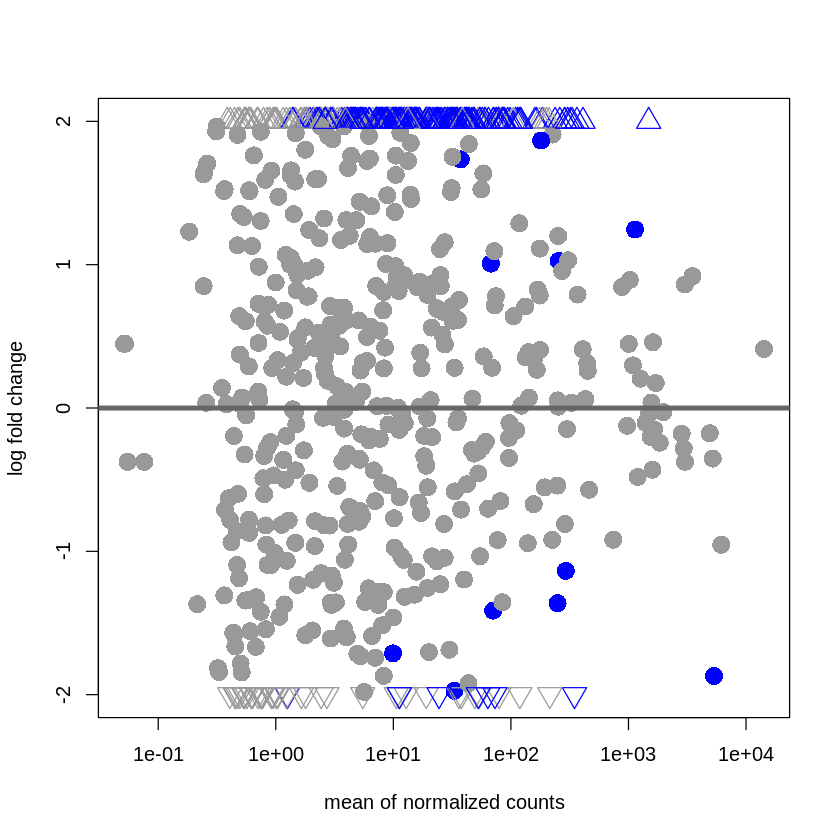

In [ ]:
plotMA(res, Main = "DESeq2", ylim = c(-2,2), cex = 2)

## find the min and max of log2fold change for plotting

In [ ]:
summary(res$log2FoldChange)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.5044 -0.3363  0.9815  1.7153  3.4650 23.8034 

## Volcano plot
The volcano plot summarises the differential gene expression analysis.
NS (grey) : non significant genes
Log2FC (green): gene with absolute fold change greater than 1
p value (blue) : genes that are statistically significant but no difference in the fold change
p value and log2FC (red) : genes that are statistically significant and a difference in the fold change that is great than 1 in absolute scale.

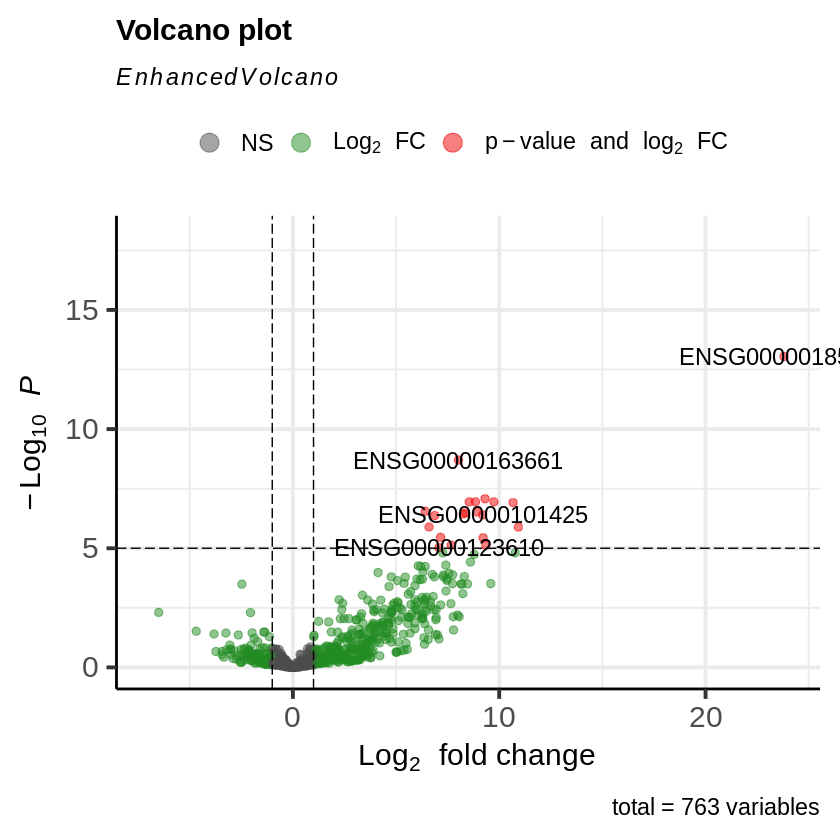

In [ ]:
EnhancedVolcano(res,
                x = 'log2FoldChange',
                y = 'padj',
                lab = rownames(res),
                xlim = c(-7,24))

##Output results in.txt format

In [ ]:
write.table(res,"DESeq2_PDX_R1.txt", row.names=TRUE,col.names=TRUE, sep="\t", quote=TRUE, append=TRUE)

Warning message in write.table(res, "DESeq2_PDX_R1.txt", row.names = TRUE, col.names = TRUE, :
“appending column names to file”


In [ ]:
# Install and load required packages
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [ ]:
organism = "org.Hs.eg.db"
BiocManager::install(organism, character.only = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'org.Hs.eg.db'

also installing the dependencies ‘plogr’, ‘png’, ‘Biostrings’, ‘RSQLite’, ‘KEGGREST’, ‘AnnotationDbi’


Old packages: 'dbplyr', 'dtplyr', 'googledrive'



In [ ]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi





In [ ]:
BiocManager::install("AnnotationDbi")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'AnnotationDbi'”
Old packages: 'dbplyr', 'dtplyr', 'googledrive'



In [ ]:
library(AnnotationDbi)

In [ ]:
# Filter the DESeq results based on fold change and adjusted p-value
filtered_res <- res[which(res$padj < 0.05 & abs(res$log2FoldChange) > 1), ]

# Get Ensembl IDs from row names of filtered_res
ensembl_ids <- rownames(filtered_res)

# Convert Ensembl IDs to gene symbols using org.Hs.eg.db
gene_symbols <- mapIds(org.Hs.eg.db,
                       keys = ensembl_ids,
                       column = "SYMBOL",
                       keytype = "ENSEMBL",
                       multiVals = "first")

# Remove missing values in gene_symbols
gene_symbols <- gene_symbols[!is.na(gene_symbols)]

# Subset filtered_res to include only genes with valid symbols
filtered_res <- filtered_res[names(gene_symbols), ]

# Replace Ensembl IDs with gene symbols in filtered_res
rownames(filtered_res) <- gene_symbols

'select()' returned 1:many mapping between keys and columns



In [ ]:
# Create a new column in 'res' and fill with NAs
res$gene_symbol <- NA

# Replace NAs with corresponding gene symbols where available
res$gene_symbol[match(names(gene_symbols), rownames(res))] <- gene_symbols

# Save the DESeq results with gene symbols
write.table(res, "DESeq2_Result_with_gene_symbols.txt", row.names = TRUE, col.names = TRUE, sep = "\t", quote = TRUE, append = TRUE)

Warning message in write.table(res, "DESeq2_Result_with_gene_symbols.txt", row.names = TRUE, :
“appending column names to file”


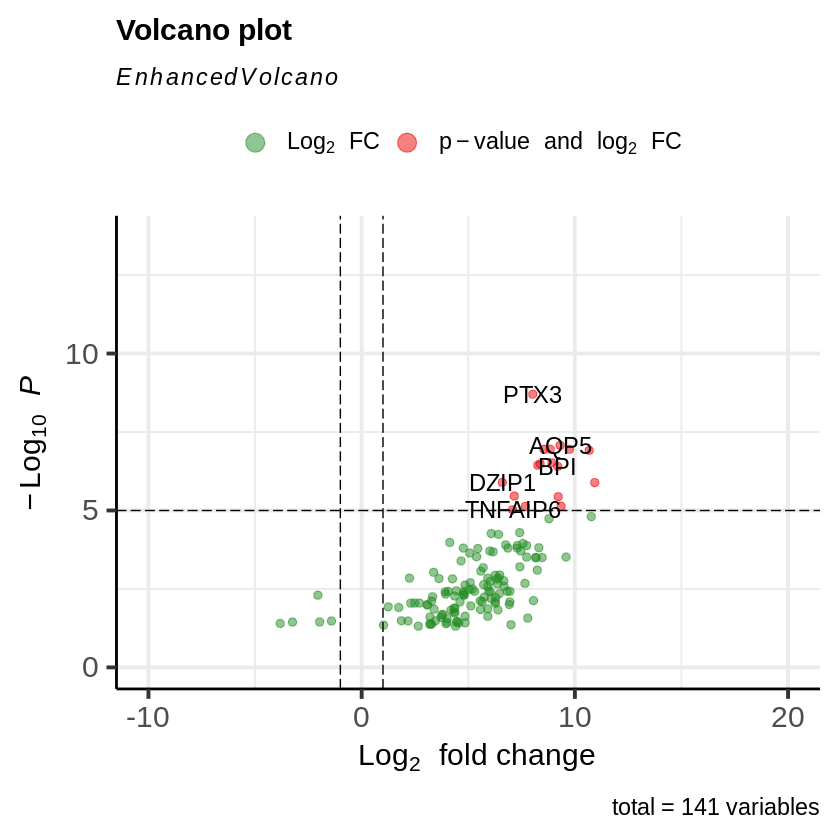

In [ ]:
# Create the volcano plot with gene symbols
EnhancedVolcano(filtered_res,
                lab = rownames(filtered_res),
                x = 'log2FoldChange',
                y = 'padj',
                xlim = c(-10, 20))

Heatmap Visualization

In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pheatmap)

In [ ]:
# Load the DESeq2 results from your DESeq2 analysis
# Ensure 'res' is the result from DESeq2 containing log2FoldChange and padj

# Extract the top 10 upregulated and top 10 downregulated genes
# Assuming 'res' is your DESeq2 result object, filter based on log2FoldChange and padj
top_upregulated <- res[order(res$log2FoldChange, decreasing = TRUE), ][1:10, ]
top_downregulated <- res[order(res$log2FoldChange, decreasing = FALSE), ][1:10, ]

# Combine top upregulated and downregulated genes
top_genes <- rbind(top_upregulated, top_downregulated)

# Get the gene names
top_gene_names <- rownames(top_genes)

# Extract expression data for the top genes from your dataset
# Assuming 'data' is your expression matrix from the image you provided
top_genes_expr <- PDXdataset[top_gene_names, ]

In [ ]:
# Now, create custom sample names based on your dataset's colnames
# Extract original column names
original_colnames <- colnames(PDXdataset)

In [ ]:
# Create custom names based on the dataset's colnames
custom_sample_names <- ifelse(grepl("Control", original_colnames),
                              paste0("Control_", seq_along(grep("Control", original_colnames))),
                              paste0("Tumor_", seq_along(grep("Tumor", original_colnames))))

In [ ]:
# Assign the new custom names to the colnames of your expression matrix
colnames(PDXdataset) <- custom_sample_names

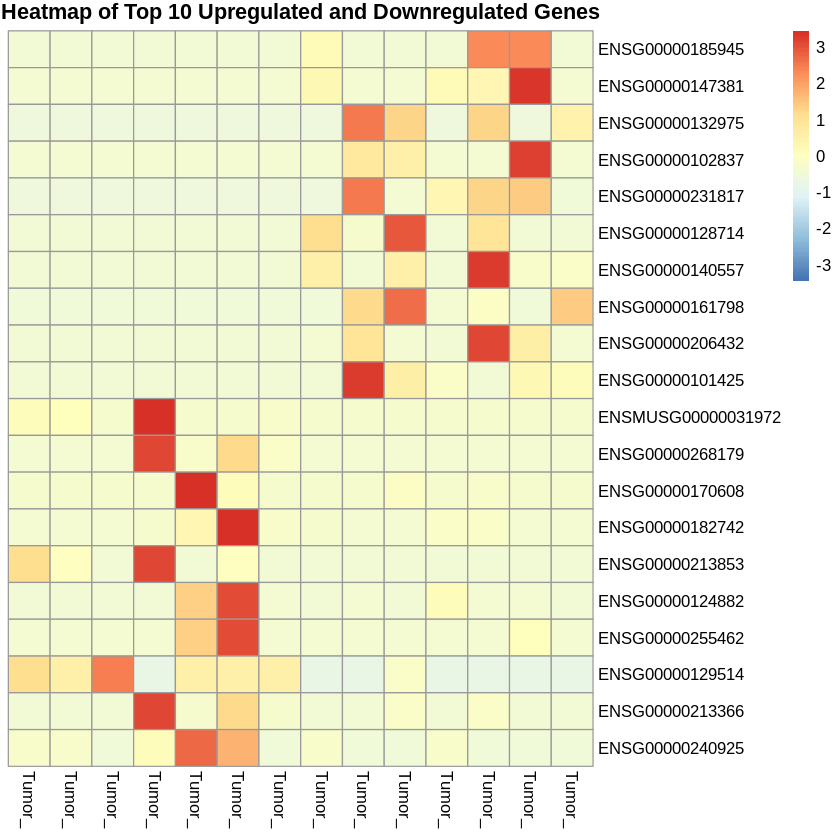

In [ ]:
# Create the heatmap using pheatmap with custom sample names
library(pheatmap)
pheatmap(top_genes_expr,
         scale = "row",              # Scale rows to center gene expression
         cluster_cols = FALSE,       # Disable column clustering (no dendrogram)
         cluster_rows = FALSE,       # Disable row clustering (no dendrogram)
         show_rownames = TRUE,       # Show gene names on y-axis
         show_colnames = TRUE,       # Show custom sample names on x-axis
         main = "Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = colnames(PDXdataset))  # Use the modified colnames

'select()' returned 1:1 mapping between keys and columns



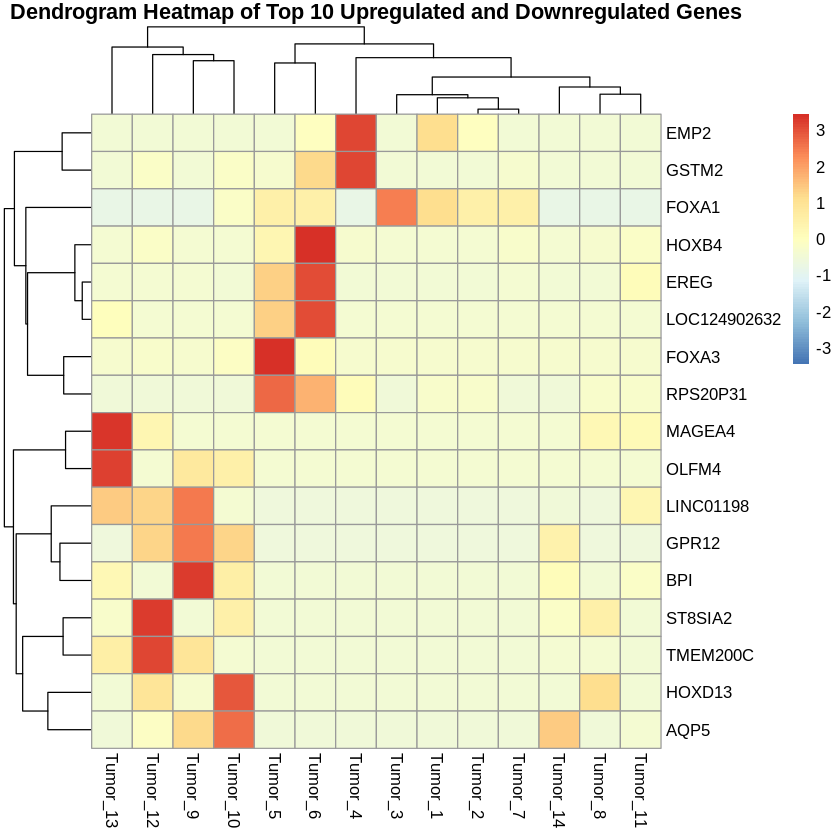

In [ ]:
# Extract the top 10 upregulated and top 10 downregulated genes
top_upregulated <- res[order(res$log2FoldChange, decreasing = TRUE), ][1:10, ]
top_downregulated <- res[order(res$log2FoldChange, decreasing = FALSE), ][1:10, ]

# Combine top upregulated and downregulated genes
top_genes <- rbind(top_upregulated, top_downregulated)

# Get the Ensembl IDs of the top genes
top_gene_ensembl_ids <- rownames(top_genes)

# Convert Ensembl IDs to gene symbols
top_gene_symbols <- mapIds(org.Hs.eg.db,
                            keys = top_gene_ensembl_ids,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals = "first")

# Remove any NA values (genes without symbols)
top_gene_symbols <- top_gene_symbols[!is.na(top_gene_symbols)]

# Subset the expression data for the top genes
top_genes_expr <- PDXdataset[names(top_gene_symbols), ]

# Create custom sample names
original_colnames <- colnames(PDXdataset)
custom_sample_names <- ifelse(grepl("Control", original_colnames),
                              paste0("Control_", seq_along(grep("Control", original_colnames))),
                              paste0("Tumor_", seq_along(grep("Tumor", original_colnames))))
colnames(top_genes_expr) <- custom_sample_names # Assign custom names


# Create the heatmap with gene symbols on the x-axis
pheatmap(top_genes_expr,
         scale = "row",
         cluster_cols = TRUE,
         cluster_rows = TRUE,
         show_rownames = TRUE,
         show_colnames = TRUE,
         main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = custom_sample_names, # Custom sample names for columns
         labels_row = top_gene_symbols)   # Gene symbols for rows

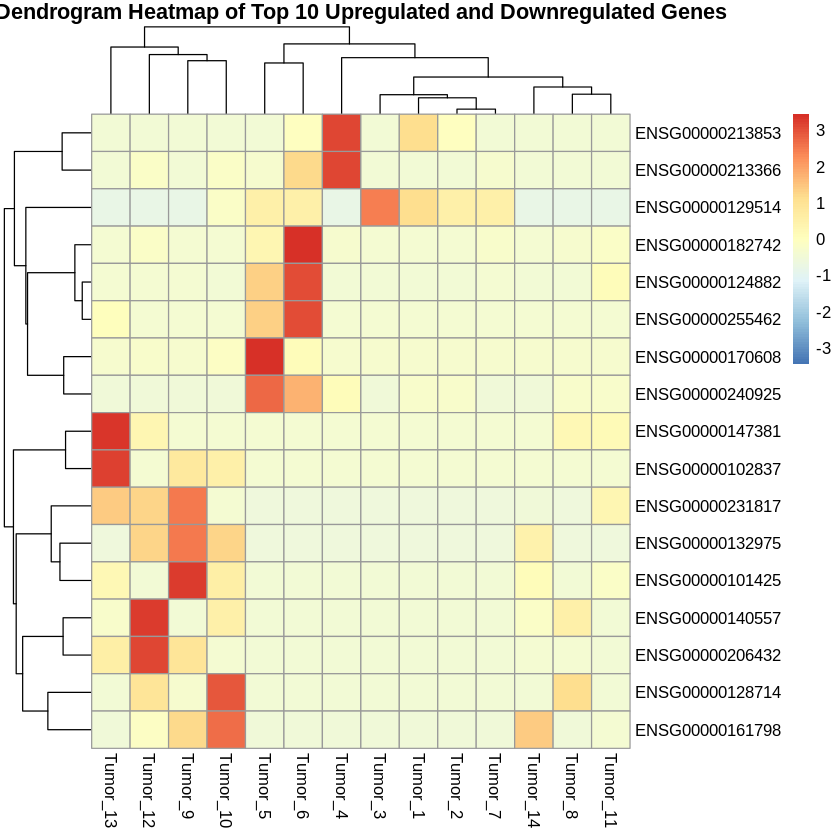

In [ ]:
library(pheatmap)
pheatmap(top_genes_expr,
         scale = "row",              # Scale rows to center gene expression
         cluster_cols = TRUE,        # Enable column clustering (dendrogram)
         cluster_rows = TRUE,        # Enable row clustering (dendrogram)
         show_rownames = TRUE,       # Show gene symbols on y-axis
         show_colnames = TRUE,       # Show custom sample names on x-axis
         main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = custom_sample_names)  # Use custom sample names for x-axis

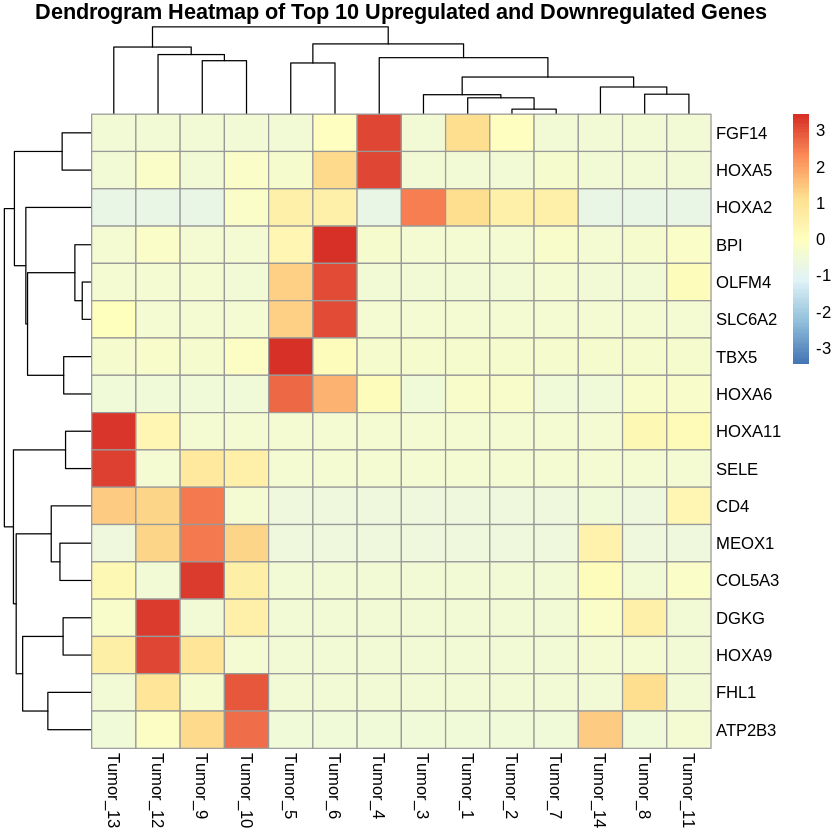

In [ ]:
library(pheatmap)
pheatmap(top_genes_expr,
         scale = "row",              # Scale rows to center gene expression
         cluster_cols = TRUE,        # Enable column clustering (dendrogram)
         cluster_rows = TRUE,        # Enable row clustering (dendrogram)
         show_rownames = TRUE,       # Show gene symbols on y-axis
         show_colnames = TRUE,       # Show custom sample names on x-axis
         main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
         labels_col = custom_sample_names,
         labels_row = gene_symbols)  # Use custom sample names for x-axis

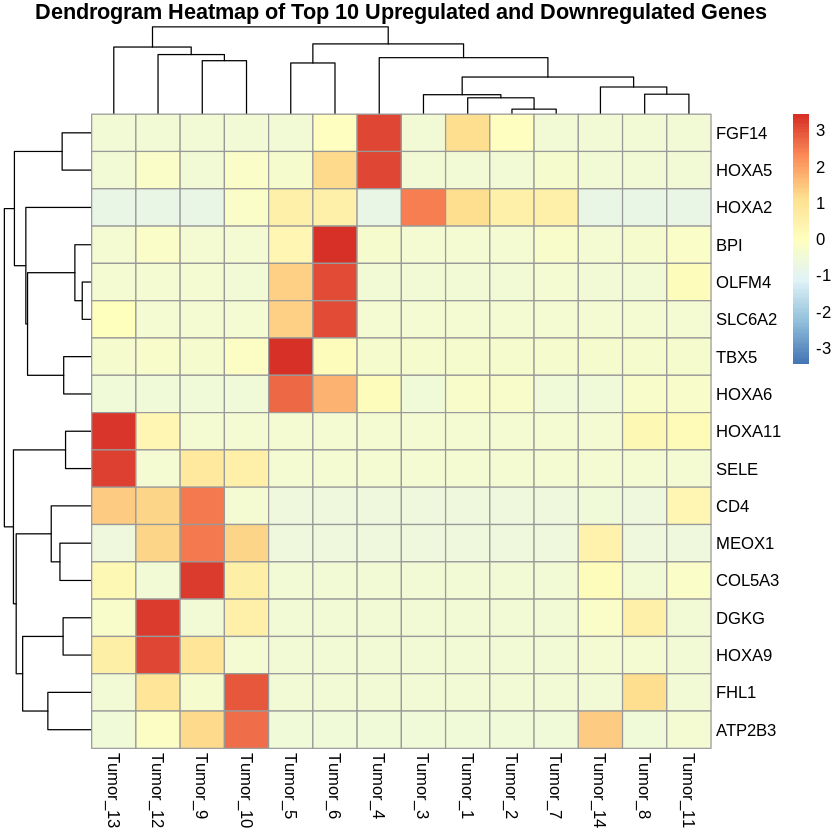

In [ ]:
# Store the heatmap as an object
Dendrogram_Heatmap <- pheatmap(top_genes_expr,
                     scale = "row",              # Scale rows to center gene expression
                     cluster_cols = TRUE,        # Enable column clustering (dendrogram)
                     cluster_rows = TRUE,        # Enable row clustering (dendrogram)
                     show_rownames = TRUE,       # Show gene symbols on y-axis
                     show_colnames = TRUE,       # Show custom sample names on x-axis
                     main = "Dendrogram Heatmap of Top 10 Upregulated and Downregulated Genes",
                     labels_col = custom_sample_names,
                     labels_row = gene_symbols)


In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load the gridExtra package for saving
library(gridExtra)

# Save the heatmap object as a PNG file
png("/content/Dendrogram_Heatmap.png", width = 10, height = 10, units = "in", res = 300)
grid::grid.draw(Dendrogram_Heatmap$gtable)
dev.off()

# Save the heatmap object as a TIFF file
tiff("/content/Dendrogram_Heatmap.tiff", width = 10, height = 10, units = "in", res = 300)
grid::grid.draw(Dendrogram_Heatmap$gtable)
dev.off()

# Save the heatmap object as a PDF file
pdf("/content/Dendrogram_Heatmap.pdf", width = 10, height = 10)
grid::grid.draw(Dendrogram_Heatmap$gtable)
dev.off()



Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




agg_record_231610288 
                   2

agg_record_231610288 
                   2

agg_record_231610288 
                   2

#KEGG Pathway Analysis


In [ ]:
# Install and load required packages
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [ ]:
BiocManager::install("gage")
BiocManager::install("gageData")
BiocManager::install("pathview")
BiocManager::install("clusterProfiler")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'gage'

also installing the dependencies ‘graph’, ‘GO.db’


Old packages: 'dbplyr', 'dtplyr', 'googledrive'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'gageData'

Old packages: 'dbplyr', 'dtplyr', 'googledrive'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06

In [ ]:
#Load libraries
library(gage)
library(gageData)
library(pathview)
library(clusterProfiler)



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

clusterProfiler v4.16.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320


Attaching package: ‘clusterPro

In [ ]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Hs.eg.db"
BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Old packages: 'dbplyr', 'dtplyr', 'googledrive'



In [ ]:
#Load DESeq2 results file as input file
result <- read.table("https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression_DESeq2_R.txt", sep="\t", header = TRUE, row.names=1)
#Check top 10 lines in results
head(result)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000002834,6158.6549420,-0.95424421,0.4968912,-1.92042872,5.480377e-02,0.1603684062
ENSG00000003402,0.7962532,-0.33574293,1.7907171,-0.18749078,8.512759e-01,0.9167586139
ENSG00000004961,326.6897498,0.03589085,0.4714563,0.07612763,9.393176e-01,0.9689565973
ENSG00000005073,79.0227027,8.18283537,1.9284566,4.24320426,2.203507e-05,0.0003146608
ENSG00000005102,8.1139431,6.03513236,1.7242431,3.50016327,4.649733e-04,0.0037780591
ENSG00000005421,8.3147828,0.27608397,1.2677175,0.21778036,8.276002e-01,0.9047574711


In [ ]:
#list of KEGG pathways genes
data(kegg.sets.hs)

#Index of numbers of pathway
data(sigmet.idx.hs)

#Extract cleaner gene set of important pathways
kegg.sets.hs <- kegg.sets.hs[sigmet.idx.hs]

In [ ]:
# Convert gene symbols to ENTREZ IDs for KEGG
ids <- bitr(rownames(result), fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# Remove duplicate gene symbols
dedup_ids <- ids[!duplicated(ids$ENSEMBL),]

# Create a new dataframe with only mapped genes
res_dedup <- result[dedup_ids$ENSEMBL,]
res_dedup$ENTREZID <- dedup_ids$ENTREZID

# Extract the log2 fold changes and map with ENTREZID
foldchanges <- res_dedup$log2FoldChange
names(foldchanges) <- res_dedup$ENTREZID
foldchanges <- na.omit(foldchanges)  # Remove any NAs
foldchanges <- sort(foldchanges, decreasing=TRUE)  # Sort in decreasing order

# Check top fold change values
head(foldchanges)

# Run GAGE pathway analysis for KEGG (use same.dir=FALSE to detect both up/down pathways)
kegg_result <- gage(foldchanges, gsets=kegg.sets.hs, same.dir=FALSE)


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(result), fromType = "ENSEMBL", toType = "ENTREZID", :
“41.15% of input gene IDs are fail to map...”


4103      2835     10562 101929344      3239      8128 
10.928807 10.771132 10.672217  9.741939  9.587056  9.352948

In [ ]:
# Write all pathways (up and down) with statistics to a file
write.table(kegg_result, file="all_pathways.txt", sep="\t", row.names=TRUE, quote=FALSE)



Let's look at the result object. It is a list with three elements (“greater”, “less” and “stats”).

In [ ]:
#Check attributes
attributes(kegg_result)

$names
[1] "greater" "stats"

In [ ]:
#Check upregulated pathways
head(kegg_result$greater)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa04514 Cell adhesion molecules (CAMs),0.4035655,0.2477515,0.4035655,0.9878981,10,0.4035655
hsa04510 Focal adhesion,0.6801802,-0.4770104,0.6801802,0.9878981,10,0.6801802
hsa04810 Regulation of actin cytoskeleton,0.7536495,-0.7004693,0.7536495,0.9878981,10,0.7536495
hsa04145 Phagosome,0.9878981,-2.5466261,0.9878981,0.9878981,12,0.9878981
hsa00232 Caffeine metabolism,NA,NaN,NA,NA,0,NA
hsa00983 Drug metabolism - other enzymes,NA,NaN,NA,NA,1,NA


In [ ]:
#check down regulated pathways
head(kegg_result$less)

NULL

In [ ]:
#Extract all upregulated pathways data
Upreg_pathways <- data.frame(Pathway_id=rownames(kegg_result$greater), kegg_result$greater)

#write all upregulated pathways into a file
write.table(Upreg_pathways, file="upregulated_pathways.txt", sep="\t", row.names=F, quote=FALSE)

In [ ]:
#Extract all downregulated pathways data
Downreg_pathways <- data.frame(Pathway_id=rownames(kegg_result$less), kegg_result$less)

#write all downregulated pathways into a file
write.table(Downreg_pathways, file="Downregulated_pathways.txt", sep="\t", row.names=F, quote=FALSE)

In [ ]:
#Visualize one upregulated pathway
pathview(gene.data=foldchanges, pathway.id="hsa04514")

Info: Downloading xml files for hsa04514, 1/1 pathways..

Info: Downloading png files for hsa04514, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04514.pathview.png



In [ ]:
#Visualize one upregulated pathway
pathview(gene.data=foldchanges, pathway.id="hsa04810")

Info: Downloading xml files for hsa04810, 1/1 pathways..

Info: Downloading png files for hsa04810, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04810.pathview.png



In [ ]:
#Obtain a different PDF based output of the same data
pathview(gene.data=foldchanges, pathway.id="hsa04514", kegg.native=FALSE)

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04514.pathview.pdf



In [ ]:
#Extract the top 5 upregulated pathways
keggrespathways_up <- rownames(kegg_result$greater)[1:5]

#Extract the IDs part of each string
keggresids_up <- substr(keggrespathways_up, start=1, stop=8)
head(keggresids_up)

#write Ids in a file
write.table(keggresids_up, file="top5_upreg_pathways_ids.txt", sep="\t", row.names=F, quote=FALSE)

[1] "hsa04514" "hsa04510" "hsa04810" "hsa04145" "hsa00232"

In [ ]:
#Draw plots for top 5 upregulated pathways
pathview(gene.data=foldchanges, pathway.id=keggresids_up, species="hsa")

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04514.pathview.png

Info: Downloading xml files for hsa04510, 1/1 pathways..

Info: Downloading png files for hsa04510, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04510.pathview.png

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04810.pathview.png

Info: Downloading xml files for hsa04145, 1/1 pathways..

Info: Downloading png files for hsa04145, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04145.pathview.png

Info: Downloading xml files for hsa00232, 1/1 pathways..

Info: Downloading png files for hsa00232, 1/1 pathways..

Argument gene.idtype or cpd.idtype may be wrong.

'select()' returned 1:1 mappin

In [ ]:
#Extract top 5 down regulated pathways
keggrespathways_down <- rownames(kegg_result$less)[1:5]

#Extract the IDs
keggresids_down = substr(keggrespathways_down, start=1, stop=8)
head(keggresids_down)

#write Ids in a file
write.table(keggresids_down, file="top5_downreg_pathways_ids.txt", sep="\t", row.names=F, quote=FALSE)

character(0)

In [ ]:
#Draw plots for top 5 dwonregulated pathways
pathview(gene.data=foldchanges, pathway.id=keggresids_down, species="hsa")

Info: Downloading xml files for hsaNA, 1/1 pathways..

Warning message in download.file(xml.url, xml.target, quiet = T):
“cannot open URL 'https://rest.kegg.jp/get/hsaNA/kgml': HTTP status was '400 Bad Request'”
This pathway may not exist!

Info: Downloading png files for hsaNA, 1/1 pathways..

This pathway may not exist!




#Gene Set Enrichment Analysis for GO


In [ ]:
BiocManager::install("clusterProfiler")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'clusterProfiler'”
Old packages: 'dbplyr', 'dtplyr', 'googledrive'



This code uses the BiocManager package to install the clusterProfiler package.

The BiocManager package is a utility package for managing Bioconductor packages, which are specialized packages for the analysis of biological data. The install function is called to install the clusterProfiler package. This package provides tools for functional enrichment analysis and visualization of gene expression data, which can be used to gain insight into the biological functions and pathways associated with differentially expressed genes.

To use this code, you will need to have the BiocManager package installed. Once you have it installed, you can simply copy and paste this code into your R console or script and it will download and install the clusterProfiler package.

In [ ]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Hs.eg.db"
BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Old packages: 'dbplyr', 'dtplyr', 'googledrive'



This code installs and loads the org.Hs.eg.db package, which provides annotation data for the human genome.

The first line of code sets the desired organism as a character string, which in this case is "org.Hs.eg.db". This indicates that the package containing the annotation data for the human genome should be used.

The second line of code uses the BiocManager package to install the org.Hs.eg.db package. The character.only = TRUE argument ensures that the argument is treated as a character string.

The third line of code loads the org.Hs.eg.db package, which makes the annotation data available for use in the R environment.

Overall, this code prepares the necessary annotation data for the human genome, which can be used in downstream analyses such as gene ontology enrichment analysis or pathway analysis.

In [ ]:
library(clusterProfiler)

In [ ]:
#Load DESeq2 results file as input file
result <- read.table("https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression_DESeq2_R.txt", sep="\t", header = TRUE, row.names=1)
#Check top 10 lines in results
head(result)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000002834,6158.6549420,-0.95424421,0.4968912,-1.92042872,5.480377e-02,0.1603684062
ENSG00000003402,0.7962532,-0.33574293,1.7907171,-0.18749078,8.512759e-01,0.9167586139
ENSG00000004961,326.6897498,0.03589085,0.4714563,0.07612763,9.393176e-01,0.9689565973
ENSG00000005073,79.0227027,8.18283537,1.9284566,4.24320426,2.203507e-05,0.0003146608
ENSG00000005102,8.1139431,6.03513236,1.7242431,3.50016327,4.649733e-04,0.0037780591
ENSG00000005421,8.3147828,0.27608397,1.2677175,0.21778036,8.276002e-01,0.9047574711


This code reads in a DESeq2 results file from a URL and assigns it to the result variable.

The read.table function is used to read in the file, which is in tab-separated format (indicated by sep="\t") and has a header row (indicated by header=TRUE). The row.names=1 argument specifies that the first column of the file should be used as row names in the resulting data frame.

The URL points to a file hosted on GitHub and contains gene expression data for a set of PDX (patient-derived xenograft) samples.

The head function is then used to display the top 10 lines of the result data frame, which allows you to inspect the contents of the file and verify that it was loaded correctly.

In [ ]:
# Convert gene IDs for gseKEGG function
# We will lose some genes here because not all IDs will be converted
ids<-bitr(rownames(result), fromType = "ENSEMBL", toType = "SYMBOL", OrgDb=organism)

# remove duplicate IDS (here I use "ENSEMBL", but it should be whatever was selected as keyType)
dedup_ids = ids[!duplicated(ids[c("ENSEMBL")]),]

# Create a new dataframe df2 which has only the genes which were successfully mapped using the bitr function above
res_dedup = result[dedup_ids$ENSEMBL,]

# Create a new column in df2 with the corresponding ENTREZ IDs
res_dedup$SYMBOL = dedup_ids$SYMBOL

#Extract the fold changes from the results
foldchanges <- res_dedup$log2FoldChange

# Name fold change vector with ENTREZ ids
names(foldchanges) <- res_dedup$SYMBOL
# Remove duplicates in foldchanges
foldchanges <- foldchanges[!duplicated(names(foldchanges))]


# omit any NA values
foldchanges<-na.omit(foldchanges)

# sort the list in decreasing order (required for clusterProfiler)
foldchanges = sort(foldchanges, decreasing = TRUE)

#check top 5 values
head(foldchanges)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(result), fromType = "ENSEMBL", toType = "SYMBOL", :
“41.15% of input gene IDs are fail to map...”


MAGEA4     GPR12     OLFM4 LINC01198    HOXD13   ST8SIA2 
10.928807 10.771132 10.672217  9.741939  9.587056  9.352948

In [ ]:
#run GSEA for GO respository
gse <- gseGO(geneList=foldchanges,
             ont ="ALL",
             keyType = "SYMBOL",
             minGSSize = 3,
             maxGSSize = 800,
             pvalueCutoff = 0.05,
             verbose = TRUE,
             OrgDb = organism,
             pAdjustMethod = "none")

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.45% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 7 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
leading edge analysis...

done...



In [ ]:
write.csv(gse,"GO_GSEA.csv")

In [ ]:
# Load the dataset
gse_data <- read.csv("/content/GO_GSEA.csv")

# Filter for Biological Process (BP), Cellular Component (CC), and Molecular Function (MF)
bp_data <- subset(gse_data, ONTOLOGY == "BP")
cc_data <- subset(gse_data, ONTOLOGY == "CC")
mf_data <- subset(gse_data, ONTOLOGY == "MF")

# Save each filtered dataframe to a separate CSV file
write.csv(bp_data, "GO_GSEA_BP.csv", row.names = FALSE)
write.csv(cc_data, "GO_GSEA_CC.csv", row.names = FALSE)
write.csv(mf_data, "GO_GSEA_MF.csv", row.names = FALSE)

# File paths for the saved files
cat("Files saved: GO_GSEA_BP.csv, GO_GSEA_CC.csv, GO_GSEA_MF.csv\n")

Files saved: GO_GSEA_BP.csv, GO_GSEA_CC.csv, GO_GSEA_MF.csv


In [ ]:
library(repr)

# Change plot size to 8 inches wide
options(repr.plot.width=10)

In [ ]:
bp_data <- filter(bp_data, ONTOLOGY == "BP")
cc_data <- filter(cc_data , ONTOLOGY == "CC")
mf_data <- filter(mf_data, ONTOLOGY == "MF")

Visualization and Interpretation

DOT PLOT

Loading required package: DOSE

DOSE v4.2.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an
R/Bioconductor package for Disease Ontology Semantic and Enrichment
analysis. Bioinformatics. 2015, 31(4):608-609



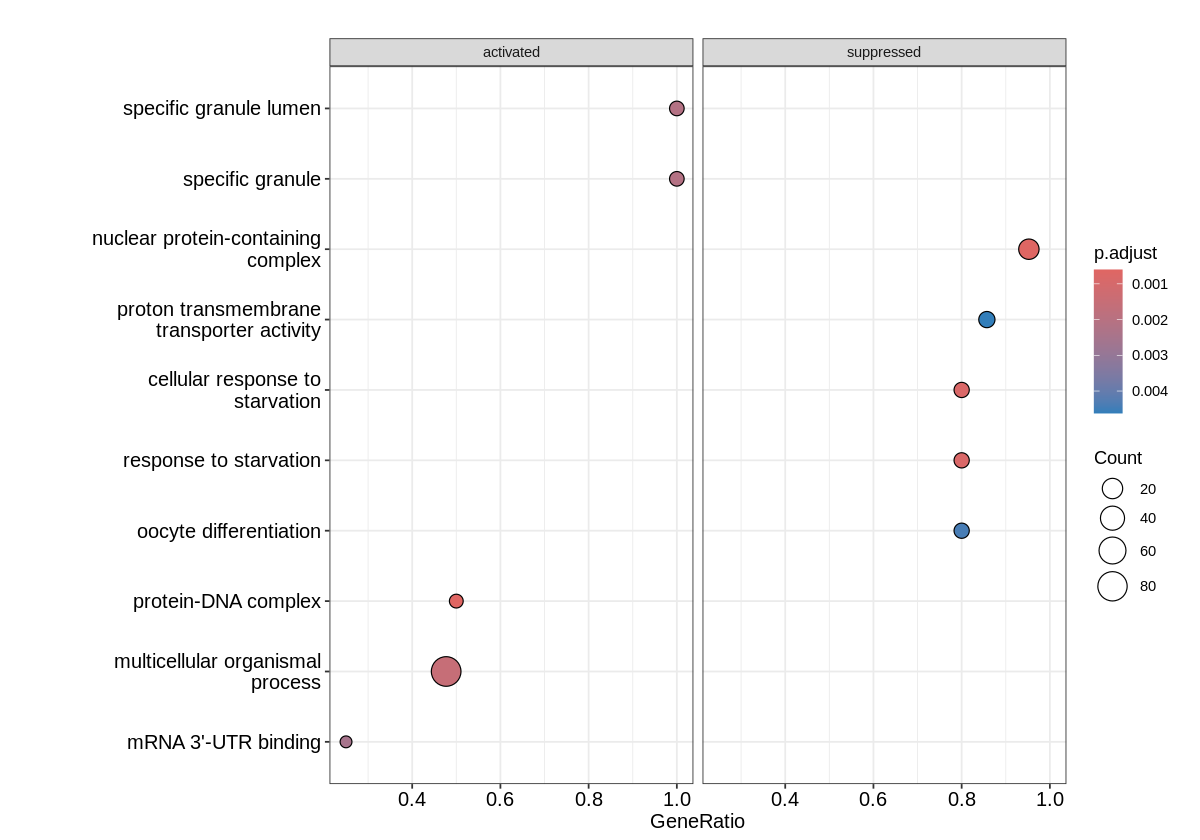

In [ ]:
require(DOSE)
dotplot(gse, showCategory=5, split=".sign") + facet_grid(.~.sign)

In [ ]:
# Load required packages
require(DOSE)
require(ggplot2)

# Generate the dot plot with bold text styling
plot <- dotplot(gse, showCategory = 5, split = ".sign") +
  facet_grid(. ~ .sign) +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text = element_text(face = "bold")
  )

# Save the plot with a custom height and bold text
ggsave("dotplot_ov_act_sup.png", plot = plot, width = 8, height = 5, dpi = 300)


In [ ]:
# Set up increased plot size for displaying
options(repr.plot.width = 13, repr.plot.height = 14)  # Adjust width and height as needed

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$title
[1] "Ontology Dot Plot"

attr(,"class")
[1] "labels"

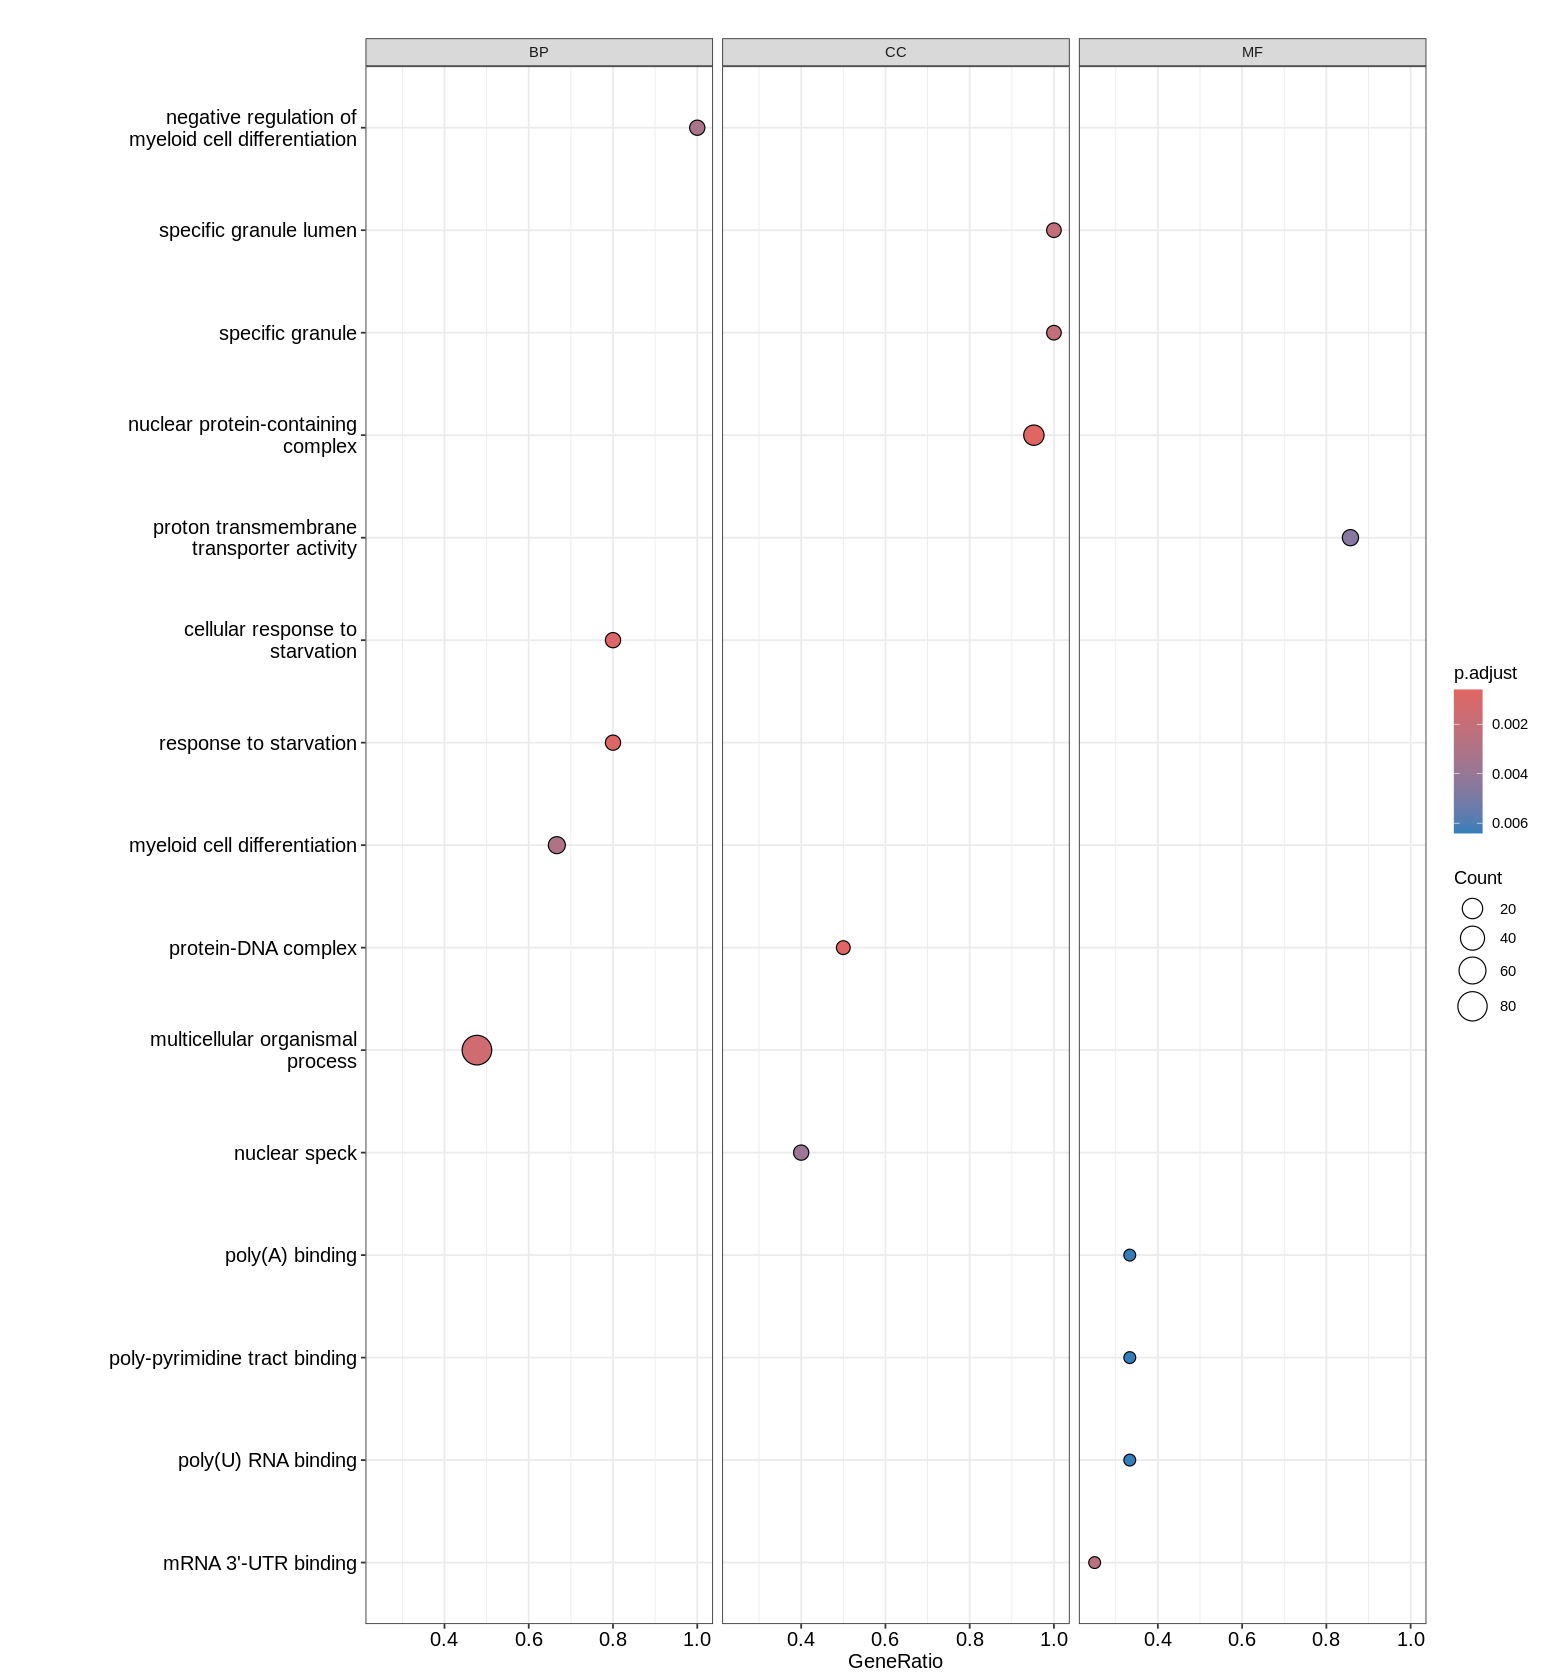

In [ ]:
# Directly display the plot with increased height
dotplot(gse, showCategory = 5, split = "ONTOLOGY") +
  facet_grid(. ~ ONTOLOGY)
ggtitle("Ontology Dot Plot")

In [ ]:
# Save the plot with a custom height and bold text
ggsave("dotplot_.png", plot = p, width = 8, height = 7, dpi = 300)

ERROR: Error: object 'p' not found


In [ ]:
library(repr)

# Change plot size to 8 inches wide
options(repr.plot.width=10)

The repr package is used to specify the graphical parameters for R plots, such as plot size, resolution, font size, etc. Here, library(repr) loads the repr package.

options(repr.plot.width=10) sets the plot width to 10 inches. This will affect any subsequent plot created in R. By default, plots are relatively small in size, so adjusting the plot size can make it easier to visualize and analyze the data.

##Dotplot

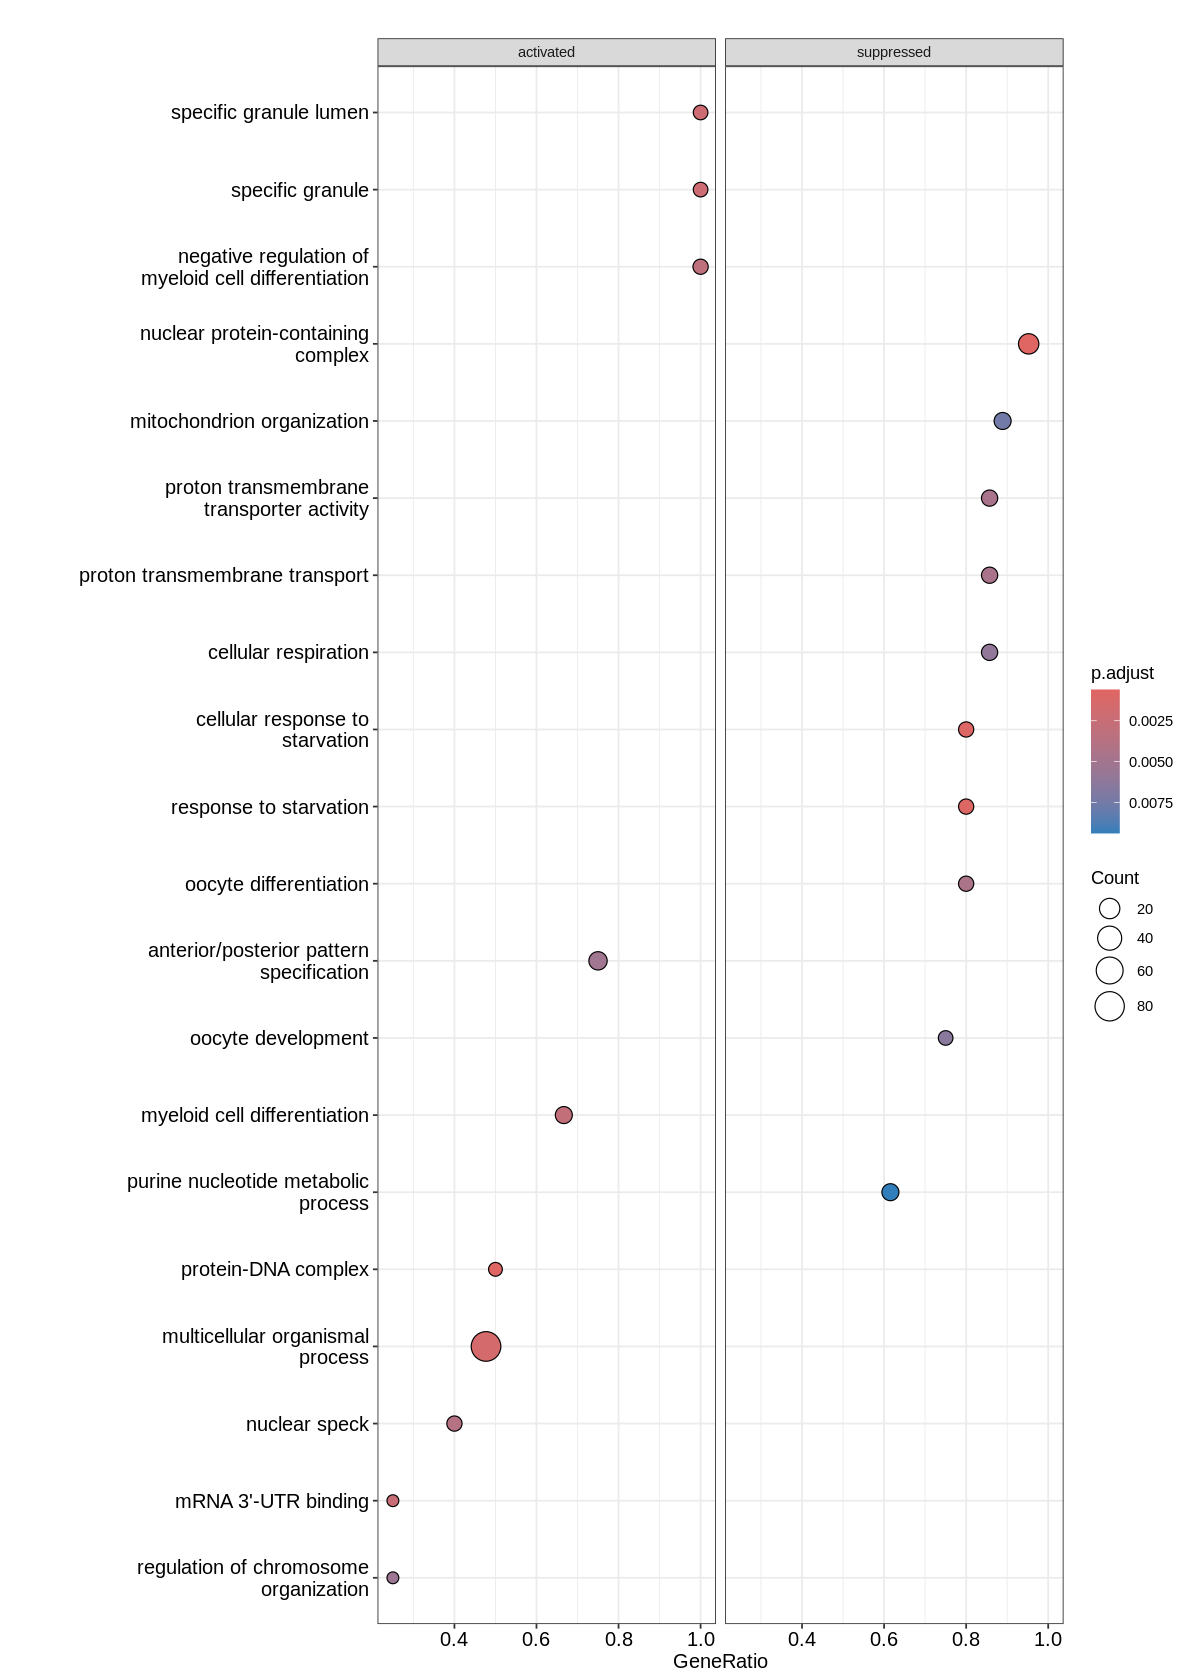

In [ ]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)

In the code snippet above, require(DOSE) loads the DOSE package which is a Bioconductor package for Disease Ontology Semantic and Enrichment analysis. The dotplot() function from the same package is then used to create a dot plot to visualize enriched gene ontology terms.

dotplot() function takes the output from gseGO() as input and creates a dot plot of the enriched GO terms. The showCategory argument controls the number of top enriched GO terms to show in the plot. The split argument splits the plot into two panels, one for upregulated genes and one for downregulated genes. Finally, facet_grid() arranges the two panels next to each other horizontally.

##Category Network Plot

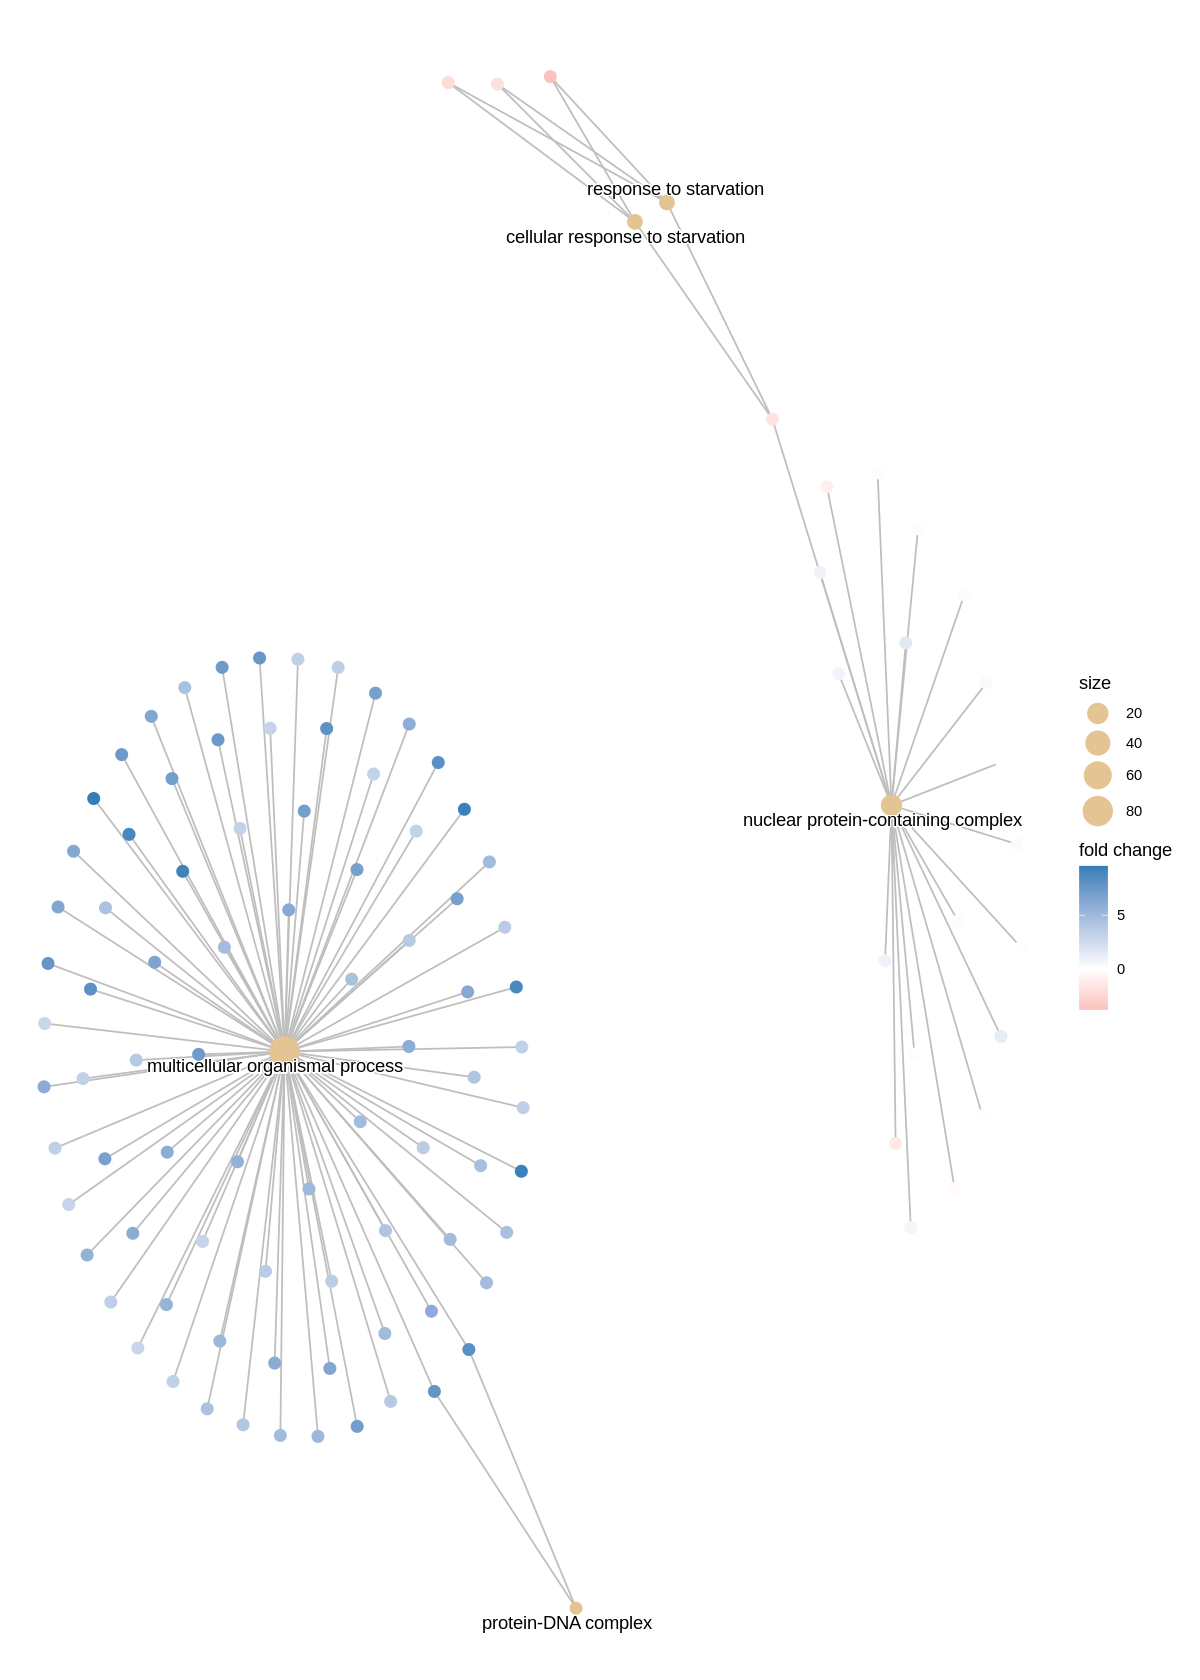

In [ ]:
# categorySize can be either 'pvalue' or 'geneNum'
cnetplot(gse,font.size=4, categorySize="geneNum", foldChange=foldchanges,max.overlaps=50,node_label="category")

This code is used to create a Cnetplot of the GSEA results using the cnetplot function from the clusterProfiler package.

The gse object generated by the gseGO function is used as input for the cnetplot function. Additionally, the foldchanges object generated earlier is used to indicate the direction of gene expression changes in the plot.

The categorySize argument is used to specify how to size the nodes in the plot. In this case, geneNum is chosen to indicate the number of genes in each category.

max.overlaps limits the number of overlapping nodes.

node_label argument is used to display the category labels as node labels.

font.size is used to specify the size of font in plot.

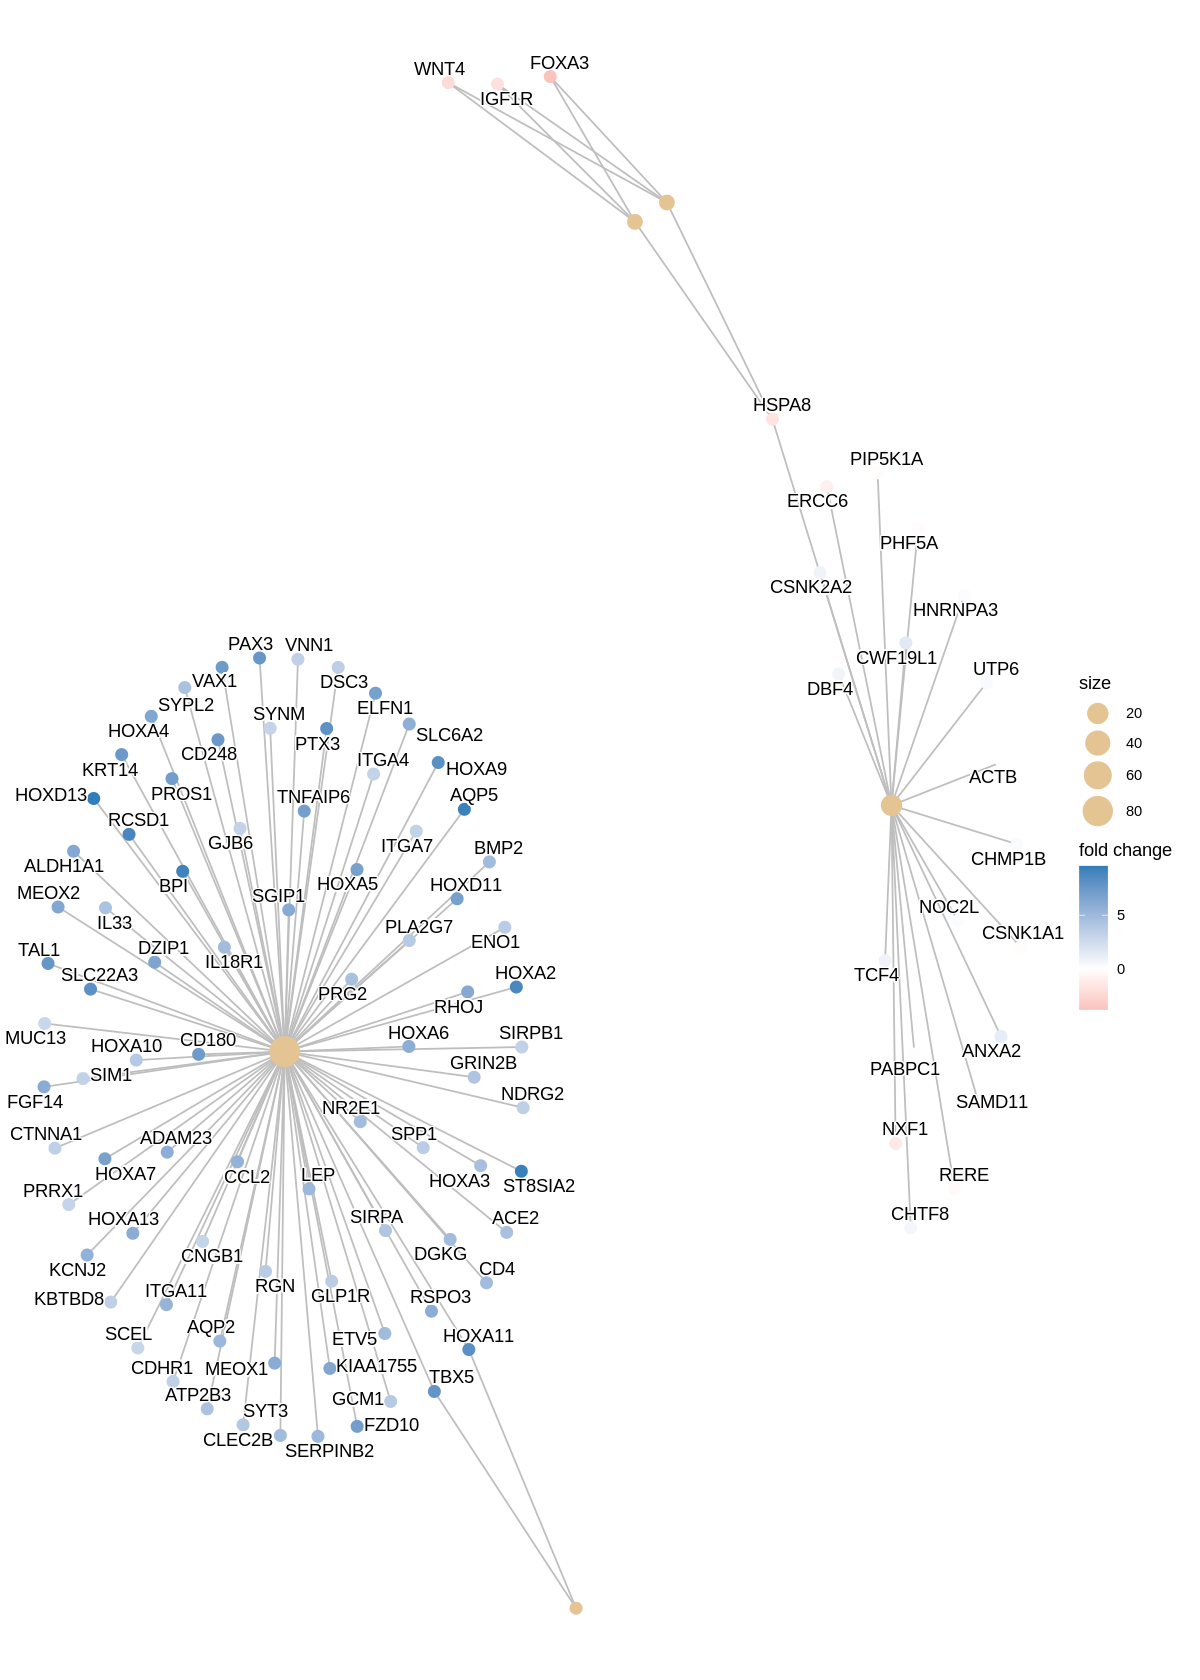

In [ ]:
cnetplot(gse,
         font.size = 4,
         categorySize = "geneNum",
         foldChange = foldchanges,
         max.overlaps = 50,
         node_label = "gene")  # This will now use SYMBOLs


cnetplot is a function in the clusterProfiler package that generates a Cnetplot, which is a network visualization that depicts gene sets as nodes and their overlap as edges. The size of the node represents the number of genes in the gene set or the significance of the gene set (depending on the categorySize parameter). The thickness of the edge represents the overlap between two gene sets.

The code above generates a Cnetplot using the gse object generated from gseGO function and the foldchanges vector, which contains the log2 fold changes for the differentially expressed genes. The font.size parameter specifies the size of the text in the plot, while the categorySize parameter sets the size of the nodes to be proportional to the number of genes in each category. The max.overlaps parameter sets the maximum number of overlaps to be displayed for each node. Finally, the node_label parameter specifies whether the nodes should be labeled with the category or the gene symbol.

##Upset plot

In [ ]:
install.packages("ggupset")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ggupset is an R package that provides a way to visualize sets and their intersections in a manner that is similar to UpSet. It can be installed using the install.packages() function, which installs the package from the Comprehensive R Archive Network (CRAN) repository.

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggplot2'”
Old packages: 'dbplyr', 'dtplyr', 'googledrive'

enrichplot v1.28.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Qianwen Wang, Ming Li, Tianzhi Wu, Li Zhan, Lin Li, Meijun Chen, Wenqin
Xie, Zijing Xie, Erqiang Hu, Shuangbin Xu, Guangchuang Yu. Exploring
epigenomic datasets by ChIPseeker. Current Protocols. 2022, 2(10): e585



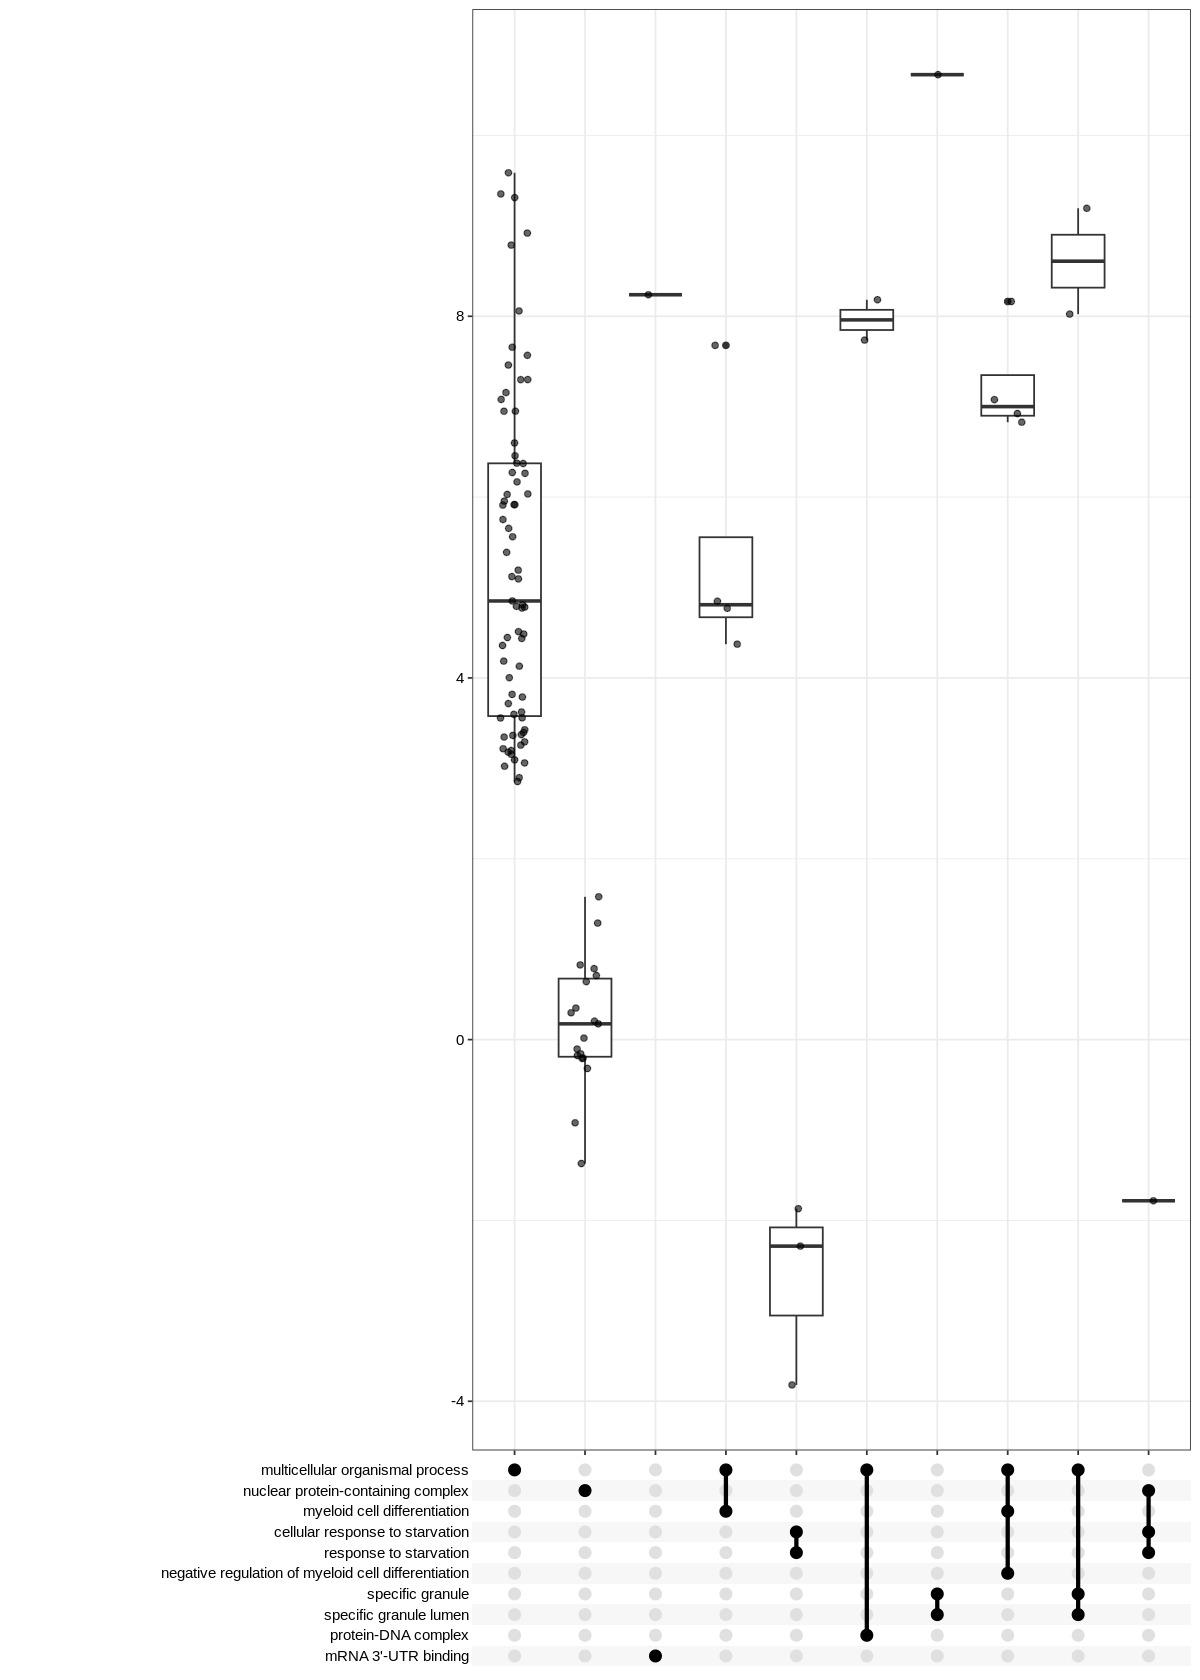

In [ ]:
# Install and load the required libraries
BiocManager::install("ggplot2")
library(ggplot2)
library(ggupset)
library(enrichplot)

# Assuming `gse` is already the result of your GSEA analysis
enrichplot::upsetplot(gse, n = 10) +
  theme(axis.text.y = element_text(size = 9))  # Applying the theme for axis text size


This code chunk first loads the ggupset library. ggupset is an extension to the ggplot2 package for visualizing sets and intersections.

The second line of code creates an upset plot using enrichplot::upsetplot(), which takes gse as input. gse is the output from the gseGO() function, which contains information on the enriched GO terms. The n = 10 parameter specifies the maximum number of sets to display. The theme() function is then used to adjust the size of the y-axis text to 9 points.

The resulting plot shows a visualization of the intersections between the enriched GO terms. The bars on the left show the number of genes enriched in each GO term, and the bars on the right show the number of intersections between each combination of GO terms. The numbers in the intersections indicate the number of genes shared by the GO terms in that intersection.

##Ridgeplot

In [ ]:
install.packages("ggridges")
library(ggridges)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ggridges is an R package for creating ridge plots, also known as Joy plots. Ridge plots are a type of data visualization that show the distribution of a numeric variable for different categories. In a ridge plot, each category is represented by a density plot, and the plots are aligned so that they share a common x-axis. This allows for easy comparison between the distributions. Ridge plots are useful for visualizing how the distribution of a variable changes across different groups or time points. The ggridges package provides an implementation of ridge plots that works well with the ggplot2 package.

Picking joint bandwidth of 0.49



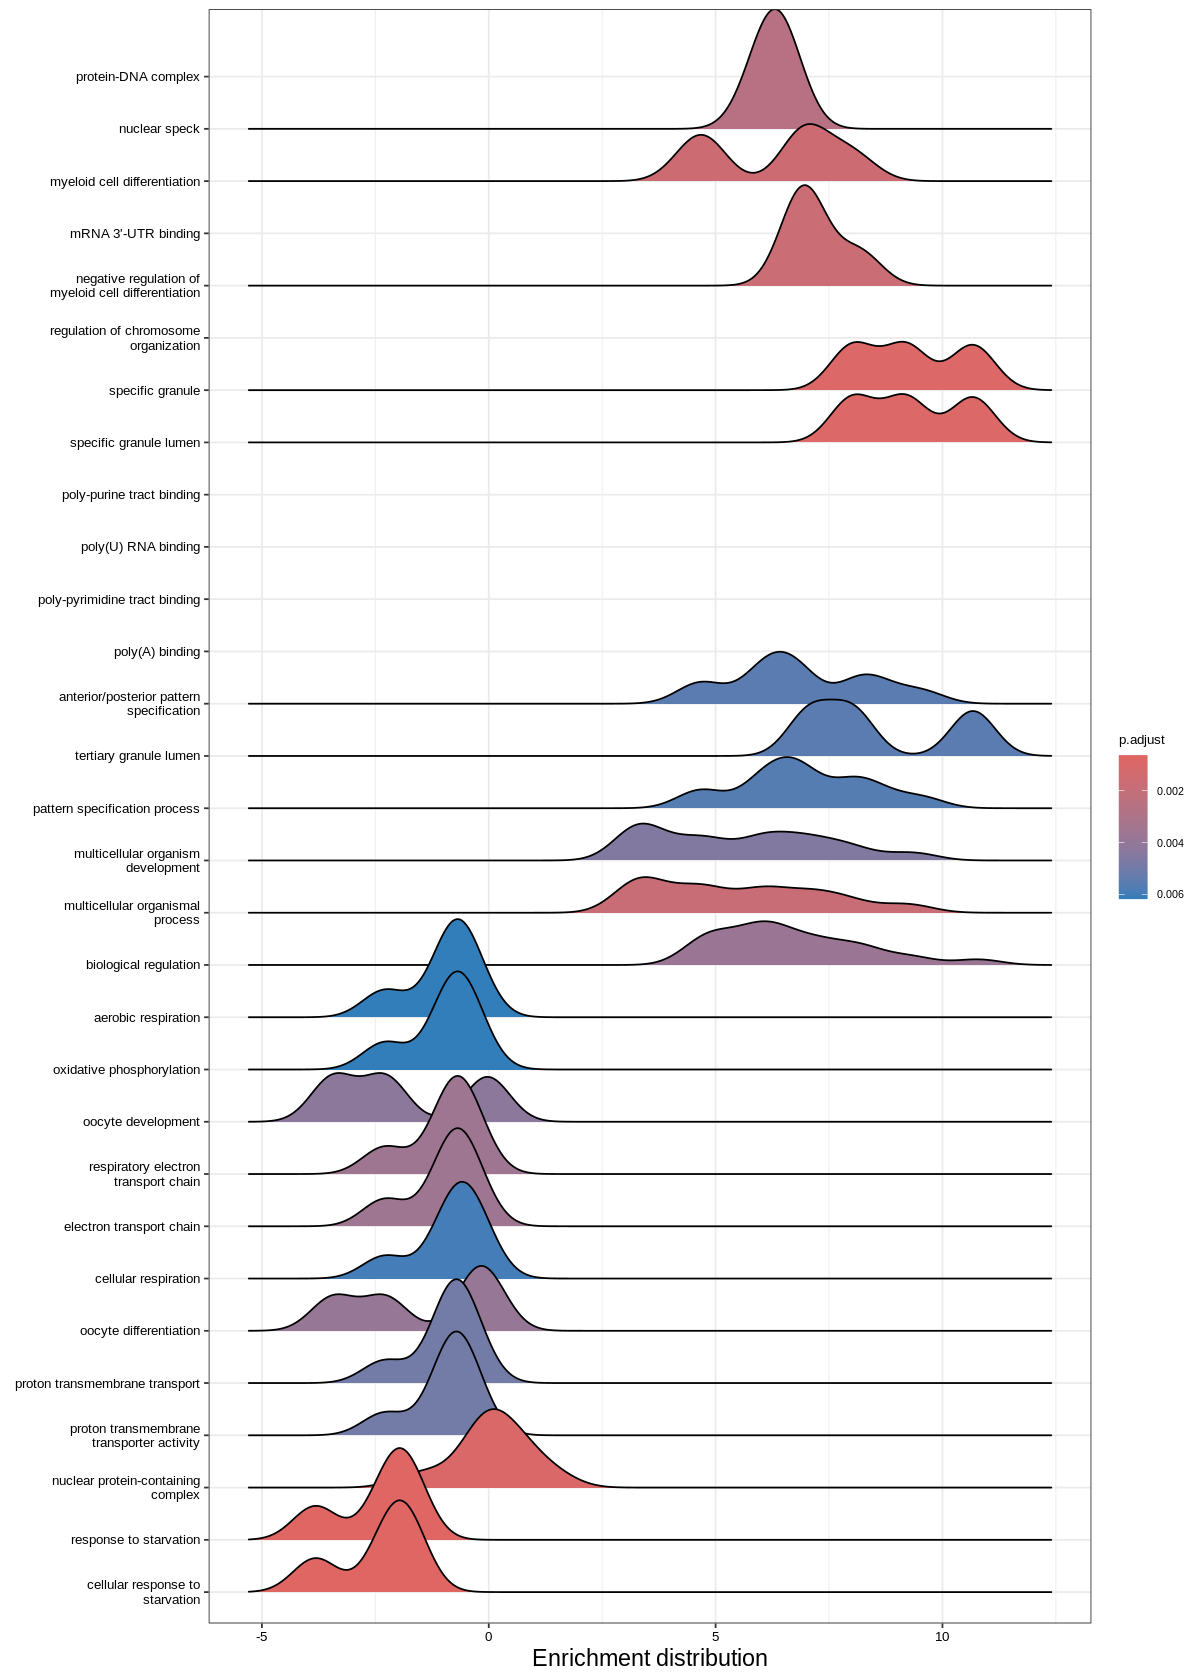

In [ ]:
ridgeplot(gse) + labs(x = "Enrichment distribution") +
  theme(text = element_text(size = 8),
        axis.text.x = element_text(size = 8),
        axis.text.y = element_text(size = 8))

In [ ]:
ggsave("ridgeplot.png", width = 20, height = 14)  # Save the plot with a larger height


Picking joint bandwidth of 0.893




ridgeplot(gse) creates a ridge plot using the gse data.

+ labs(x = "Enrichment distribution") adds a label to the x-axis of the plot. The label is "Enrichment distribution".

+ theme(text = element_text(size = 8), axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8)) customizes the theme of the plot. It sets the size of the text in the plot to 8 (using text = element_text(size = 8)), as well as the size of the text in the x-axis (axis.text.x = element_text(size = 8)) and the y-axis (axis.text.y = element_text(size = 8)).

Overall, the code creates a ridge plot of the gse data, with a label on the x-axis and customizes the size of the text in the plot and axes.

##Heat plot

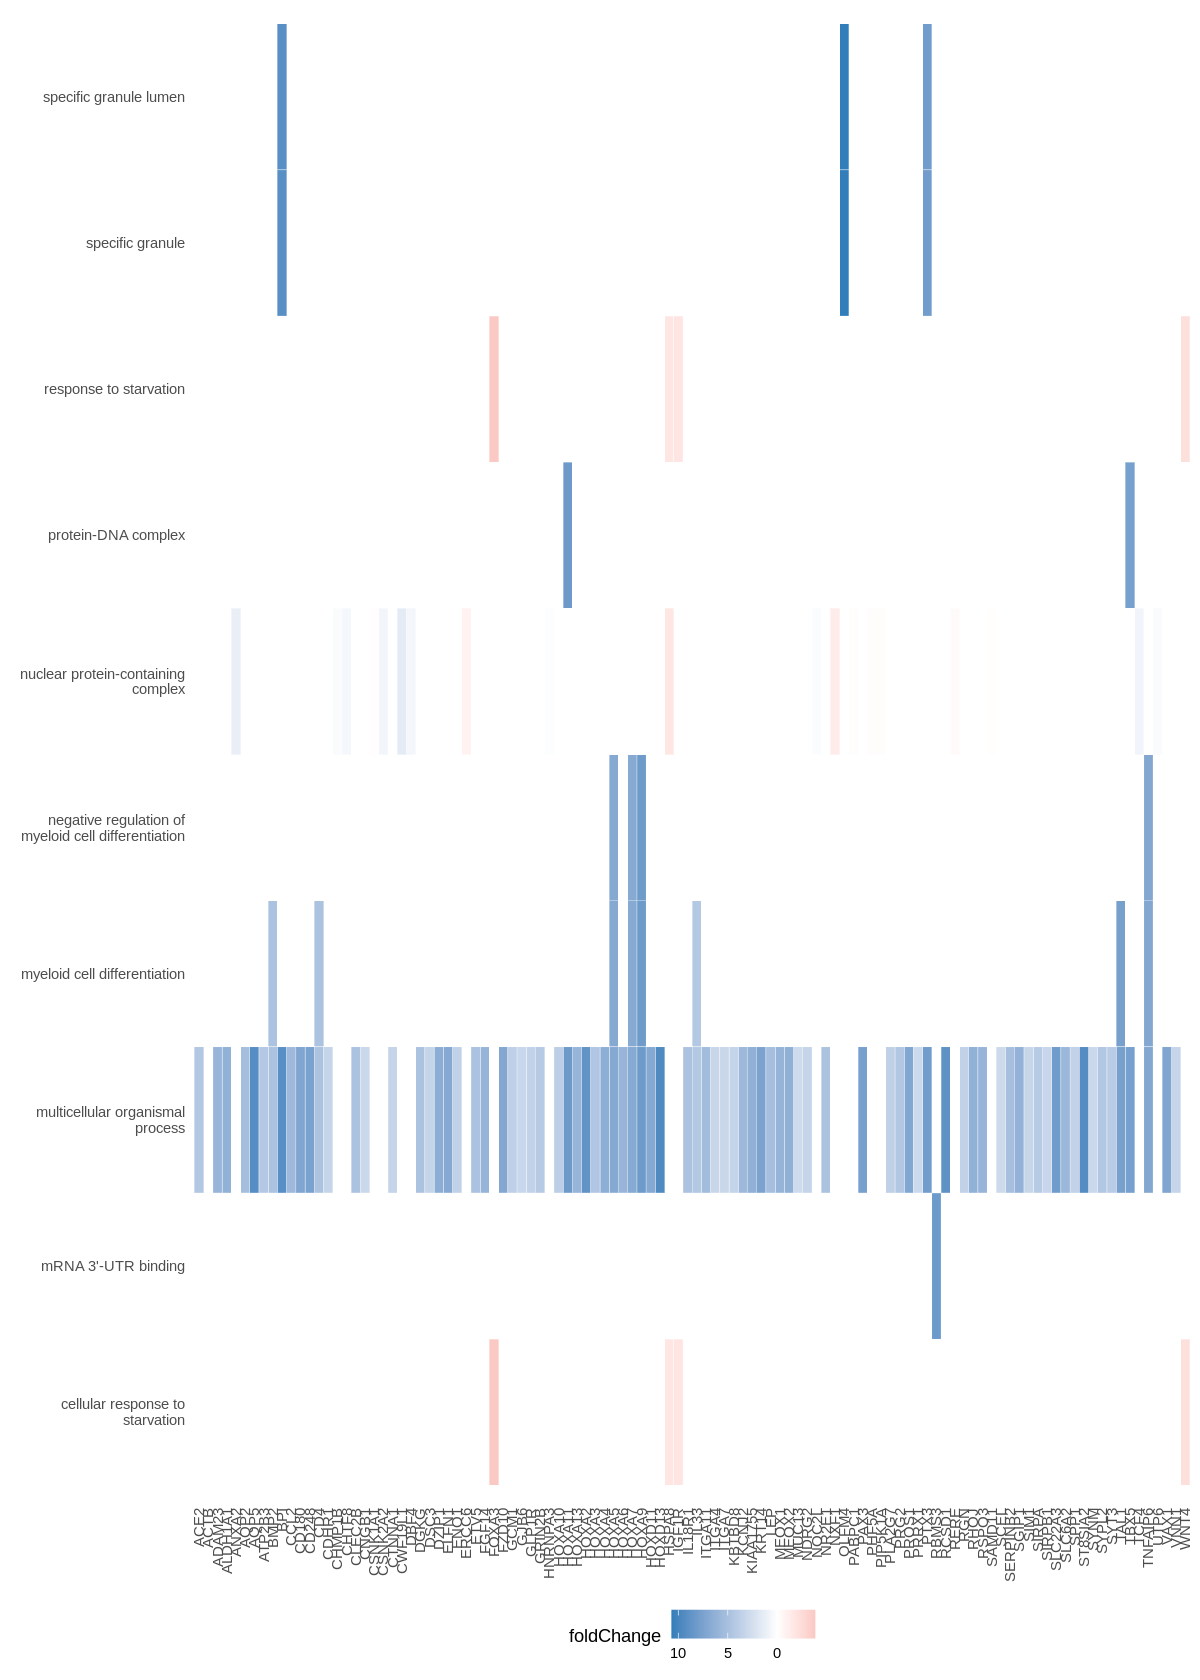

In [ ]:
heatplot(gse, showCategory = 10, foldChange=foldchanges) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=9)) +
        theme(legend.position="bottom")